In [2]:
from IPython.display import HTML, display
html_code = '''
<h1 style="background-color: darkblue;color: orange; font-size: 30px;border-radius: 20px;padding: 16px;text-align: center;">
<b style="color: lightblue;
">Predictive Analysis of Type 2 Diabetes Mellitus </b> Using Machine Learning</h1>
'''
display(HTML(html_code))

In [3]:
# # Execute ALTER TABLE statement
# # cursor.execute("""
# #     ALTER TABLE diabetes_final_data_v2
# #     MODIFY age INTEGER,
# #     MODIFY pulse_rate INTEGER,
# #     MODIFY systolic_bp INTEGER,
# #     MODIFY diastolic_bp INTEGER,
# #     MODIFY glucose FLOAT,
# #     MODIFY height FLOAT,
# #     MODIFY weight FLOAT,
# #     MODIFY bmi FLOAT;
# # """)

In [ ]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    port=3306,
    user="shfnu",
    passwd="hazily gourds balking",
    database="I501_Fall2024_Sec27791_group04_db")

cursor = conn.cursor()
cursor.execute("SELECT * FROM diabetes_final_data_v2")
data = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]  # Get column names

df = pd.DataFrame(data, columns=columns)
cursor.close()
conn.close()


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [5]:
df.head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42  Female          66          110            73     5.88    1.65   
1   35  Female          60          125            68     5.71    1.47   
2   62  Female          57          127            74     6.85    1.52   
3   73    Male          55          193           112     6.28    1.63   
4   68  Female          71          150            81     5.71    1.42   

   weight    bmi  family_diabetes  hypertensive  family_hypertension  \
0    70.2  25.75                0             0                    0   
1    42.5  19.58                0             0                    0   
2    47.0  20.24                0             0                    0   
3    57.4  21.72                0             0                    0   
4    36.0  17.79                0             0                    0   

   cardiovascular_disease  stroke  diabetic  
0                       0       0         0  
1                       0       0         0  
2                       0       0         0  
3                       0       0         0  
4                       0       0         0

In [12]:
print(f'original number of rows: {len(df)}')
print(f'Number of rows after removing erratic data: {len(df_noiseless)}')
print(f'Number of rows after final cleaning: {len(df_cleaned)}')
print(f'Number of reduced rows after final cleaning: {len(df) - len(df_cleaned)}')

original number of rows: 5437
Number of rows after removing erratic data: 5386
Number of rows after final cleaning: 5386
Number of reduced rows after final cleaning: 51


# checking erratic values from df.describe().....min and max values

In [ ]:
df.describe()

# Visualisation of data before removing erratic values

In [ ]:
sns.boxplot(df['pulse_rate'],orient = 'h')

In [ ]:
sns.boxplot(df['systolic_bp'], orient='h')

In [ ]:
sns.boxplot(df['diastolic_bp'], orient='h')

In [ ]:
sns.boxplot(df['glucose'],orient = 'h')

In [ ]:
sns.boxplot(df['height'],orient = 'h')

In [ ]:
sns.boxplot(df['weight'],orient = 'h')

In [ ]:
sns.boxplot(df['bmi'],orient = 'h')

# Any value above upper bound and below lower bound is considerd noise and is deleted

In [7]:
limits = {
    'height': (1, 2.5),
    'weight': (30, 300),
    'pulse_rate': (40, 180),
    'glucose': (2, 30)
}

df_noiseless = df.copy()

for column, (lower, upper) in limits.items():
    if column in df_noiseless.columns:  
        df_noiseless = df_noiseless[(df_noiseless[column] >= lower) & (df_noiseless[column] <= upper)]
    else:
        print(f"Column '{column}' not found in the DataFrame. Skipping.")

print(f"Cleaned DataFrame: {len(df_noiseless)}")
df_noiseless


Cleaned DataFrame: 5386


age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0      42  Female          66          110            73     5.88    1.65   
1      35  Female          60          125            68     5.71    1.47   
2      62  Female          57          127            74     6.85    1.52   
3      73    Male          55          193           112     6.28    1.63   
4      68  Female          71          150            81     5.71    1.42   
...   ...     ...         ...          ...           ...      ...     ...   
5432   74    Male          83          164            89     6.47    1.60   
5433   75    Male          67          141           104     8.31    1.65   
5434   40  Female          67          134           114     7.61    1.50   
5435   36  Female          62          139            80     4.90    1.52   
5436   26  Female          80          134            93     5.15    1.47   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
0       70.2  25.75                0             0                    0   
1       42.5  19.58                0             0                    0   
2       47.0  20.24                0             0                    0   
3       57.4  21.72                0             0                    0   
4       36.0  17.79                0             0                    0   
...      ...    ...              ...           ...                  ...   
5432    64.0  24.99                0             1                    0   
5433    62.0  22.75                0             0                    0   
5434    69.0  30.72                0             1                    0   
5435    41.5  17.87                0             0                    0   
5436    67.1  30.92                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
0                          0       0         0  
1                          0       0         0  
2                          0       0         0  
3                          0       0         0  
4                          0       0         0  
...                      ...     ...       ...  
5432                       1       0         0  
5433                       0       0         1  
5434                       0       1         0  
5435                       0       0         0  
5436                       0       0         0  

[5386 rows x 15 columns]

In [8]:
df_noiseless.describe()

age   pulse_rate  systolic_bp  diastolic_bp      glucose  \
count  5386.000000  5386.000000  5386.000000   5386.000000  5386.000000   
mean     45.493316    76.826216   133.800037     82.051244     7.563754   
std      14.257717    12.136131    22.255133     12.505997     2.843382   
min       8.000000    40.000000    62.000000     45.000000     2.000000   
25%      35.000000    69.000000   119.000000     73.000000     6.000000   
50%      45.000000    76.000000   130.000000     81.000000     6.925000   
75%      55.000000    84.000000   147.000000     90.000000     8.120000   
max     112.000000   133.000000   231.000000    119.000000    30.000000   

            height       weight          bmi  family_diabetes  hypertensive  \
count  5386.000000  5386.000000  5386.000000      5386.000000   5386.000000   
mean      1.549720    53.703063    22.351444         0.037319      0.110100   
std       0.076742    10.011741     4.076193         0.189560      0.313044   
min       1.190000    30.000000    12.100000         0.000000      0.000000   
25%       1.520000    46.825000    19.662500         0.000000      0.000000   
50%       1.550000    53.000000    21.870000         0.000000      0.000000   
75%       1.600000    60.000000    24.490000         0.000000      0.000000   
max       1.960000   100.700000    54.080000         1.000000      1.000000   

       family_hypertension  cardiovascular_disease       stroke     diabetic  
count          5386.000000             5386.000000  5386.000000  5386.000000  
mean              0.039547                0.011697     0.003713     0.063684  
std               0.194910                0.107528     0.060830     0.244211  
min               0.000000                0.000000     0.000000     0.000000  
25%               0.000000                0.000000     0.000000     0.000000  
50%               0.000000                0.000000     0.000000     0.000000  
75%               0.000000                0.000000     0.000000     0.000000  
max               1.000000                1.000000     1.000000     1.000000

#  checking null/unique/duplicated values 

In [ ]:
df_noiseless.isnull().sum()

# No missing values

In [ ]:
df_noiseless.nunique()
# All the columns with 2 values does not have any other value

In [ ]:
df_noiseless.duplicated().sum()

# No duplicate values

# CHECKING THE CORRELATION USING HEATMAP

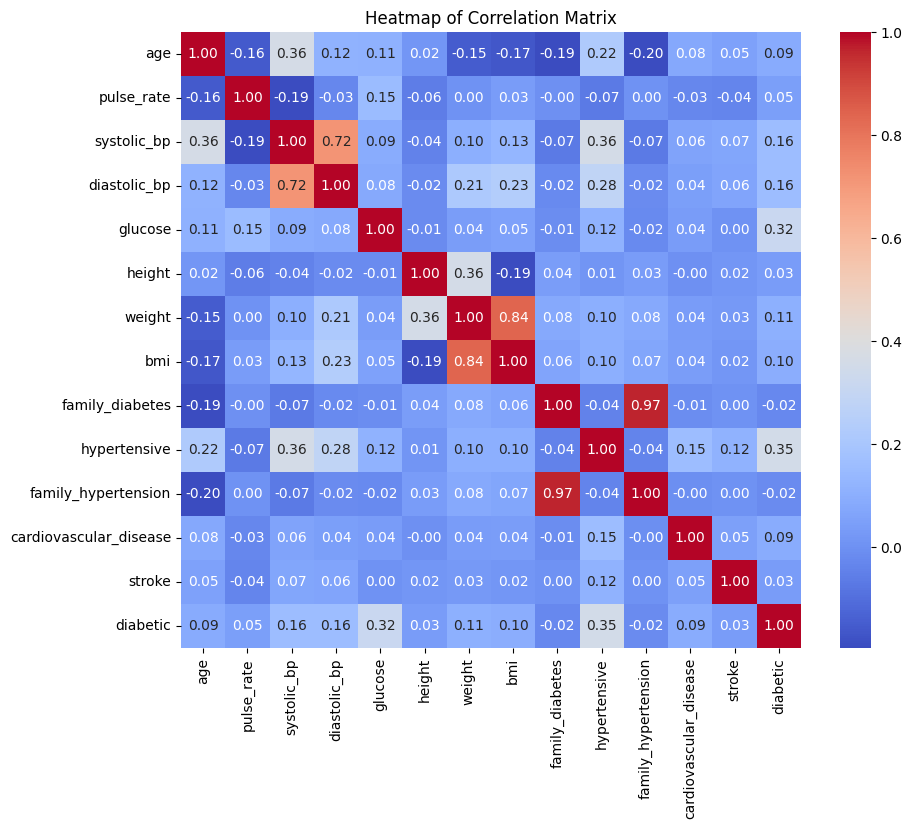

In [9]:
df_numeric = df_noiseless.select_dtypes(include=['float64', 'int64'])  
# Select only numeric columns

plt.figure(figsize=(10, 8))  
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Heatmap of Correlation Matrix")
plt.show()


# Glucose and hypertensive column shows strong positive correlation with being diabetic
# sys/dias bp and weight show some positive correlation with being diabetic
# age and cardiovascular_disease also shows very less correlation

#### Strong Correlation (|r| > 0.30)--------------------------glucose, hypertensive
#### Moderate Correlation (0.10 ≤ |r| ≤ 0.30)-----------------systolic_bp, diastolic_bp, Weight, bmi 
#### Weak Correlation (0 < |r| < 0.10)------------------------Age, Pulse_Rate, height, Cardiovascular_disease, Stroke
#### No or Negligible Correlation (|r| ≈ 0)-------------------Family_diabtes, Family_hypertension

In [13]:
df_noiseless.describe()

age   pulse_rate  systolic_bp  diastolic_bp      glucose  \
count  5386.000000  5386.000000  5386.000000   5386.000000  5386.000000   
mean     45.493316    76.826216   133.800037     82.051244     7.563754   
std      14.257717    12.136131    22.255133     12.505997     2.843382   
min       8.000000    40.000000    62.000000     45.000000     2.000000   
25%      35.000000    69.000000   119.000000     73.000000     6.000000   
50%      45.000000    76.000000   130.000000     81.000000     6.925000   
75%      55.000000    84.000000   147.000000     90.000000     8.120000   
max     112.000000   133.000000   231.000000    119.000000    30.000000   

            height       weight          bmi  family_diabetes  hypertensive  \
count  5386.000000  5386.000000  5386.000000      5386.000000   5386.000000   
mean      1.549720    53.703063    22.351444         0.037319      0.110100   
std       0.076742    10.011741     4.076193         0.189560      0.313044   
min       1.190000    30.000000    12.100000         0.000000      0.000000   
25%       1.520000    46.825000    19.662500         0.000000      0.000000   
50%       1.550000    53.000000    21.870000         0.000000      0.000000   
75%       1.600000    60.000000    24.490000         0.000000      0.000000   
max       1.960000   100.700000    54.080000         1.000000      1.000000   

       family_hypertension  cardiovascular_disease       stroke     diabetic  
count          5386.000000             5386.000000  5386.000000  5386.000000  
mean              0.039547                0.011697     0.003713     0.063684  
std               0.194910                0.107528     0.060830     0.244211  
min               0.000000                0.000000     0.000000     0.000000  
25%               0.000000                0.000000     0.000000     0.000000  
50%               0.000000                0.000000     0.000000     0.000000  
75%               0.000000                0.000000     0.000000     0.000000  
max               1.000000                1.000000     1.000000     1.000000

# Methods for Detecting Outliers
#### 1.) Statistical Methods - IQR (Interquartile Range)
#### 2.) Visualization Based Methods - Boxplot and Histplot

In [14]:
df_cleaned = df_noiseless.copy()

# Detecting and Capping the Outliers for pulse_rate

In [15]:
df_noiseless.sort_values(by='pulse_rate', ascending=True).head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
80     70    Male          40          171            72     8.66    1.70   
4453   50    Male          43          199            74     6.79    1.57   
4457   45  Female          43          199            81     6.66    1.52   
1254   50  Female          43          150           107     5.38    1.52   
5200   40    Male          44          145            90     5.41    1.63   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
80      57.0  19.68                0             0                    0   
4453    58.7  23.67                0             0                    0   
4457    47.0  20.24                0             0                    0   
1254    55.1  23.72                0             0                    0   
5200    54.2  20.51                1             0                    1   

      cardiovascular_disease  stroke  diabetic  
80                         0       0         0  
4453                       0       0         0  
4457                       0       0         0  
1254                       0       0         0  
5200                       0       1         0

In [16]:
# pulse_rate

Q1 = df_noiseless['pulse_rate'].quantile(0.25)
Q3 =  df_noiseless['pulse_rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_p = Q1 - 1.5 * IQR
upper_bound_p = Q3 + 1.5 * IQR

print(lower_bound_p)
print(upper_bound_p)


46.5
106.5


In [17]:
df_noiseless['pulse_rate'].describe()

count    5386.000000
mean       76.826216
std        12.136131
min        40.000000
25%        69.000000
50%        76.000000
75%        84.000000
max       133.000000
Name: pulse_rate, dtype: float64

In [18]:
df_cleaned['pulse_rate'] = df_noiseless['pulse_rate'].clip(lower=lower_bound_p, upper=upper_bound_p)
df_cleaned['pulse_rate'].describe()


count    5386.000000
mean       76.728463
std        11.818369
min        46.500000
25%        69.000000
50%        76.000000
75%        84.000000
max       106.500000
Name: pulse_rate, dtype: float64

/tmp/ipykernel_369354/1176537091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noiseless['pulse_rate'])


<Axes: xlabel='pulse_rate', ylabel='Density'>

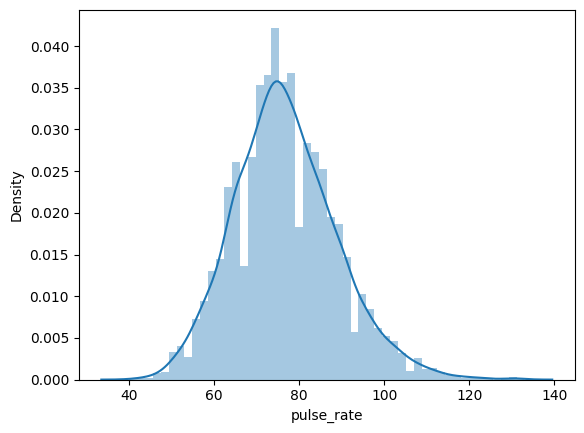

In [19]:
sns.distplot(df_noiseless['pulse_rate'])

/tmp/ipykernel_369354/2404349015.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['pulse_rate'])


<Axes: xlabel='pulse_rate', ylabel='Density'>

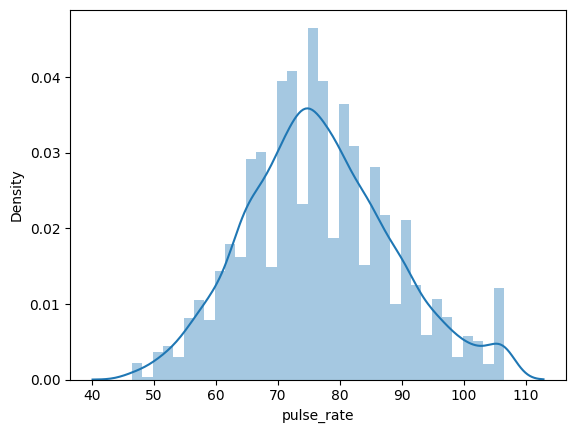

In [20]:
sns.distplot(df_cleaned['pulse_rate'])

<Axes: xlabel='pulse_rate'>

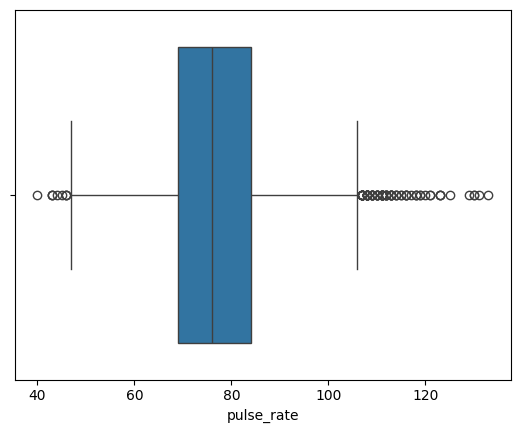

In [21]:
sns.boxplot(df_noiseless['pulse_rate'], orient='h')

<Axes: xlabel='pulse_rate'>

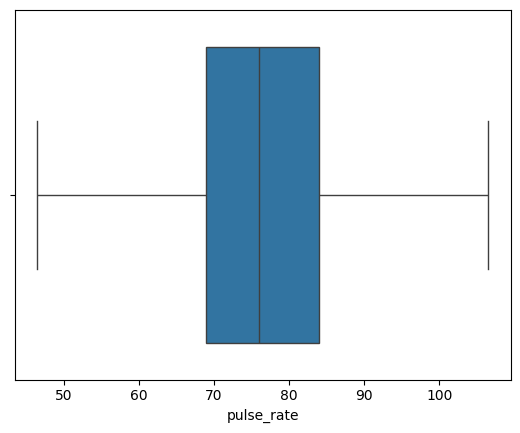

In [22]:
sns.boxplot(df_cleaned['pulse_rate'],orient = 'h')

# Detecting and Capping the Outliers for systolic_bp

In [23]:
df_noiseless.sort_values(by='systolic_bp', ascending=True).head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
2112   60  Female          78           62            51     7.98    1.55   
3527   35    Male          78           79            64     7.12    1.57   
2574   30  Female          91           82            53     6.09    1.52   
2000   60    Male          78           83            56     7.88    1.73   
4121   39    Male          91           84            69     5.00    1.67   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
2112    52.0  21.66                0             0                    0   
3527    50.3  20.28                0             0                    0   
2574    39.2  16.88                0             0                    0   
2000    53.4  17.90                0             0                    0   
4121    59.0  21.16                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
2112                       0       0         0  
3527                       0       0         0  
2574                       0       0         0  
2000                       0       0         0  
4121                       0       0         0

In [24]:
# systolic_bp

Q1 = df_noiseless['systolic_bp'].quantile(0.25)
Q3 =  df_noiseless['systolic_bp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_sbp = Q1 - 1.5 * IQR
upper_bound_sbp = Q3 + 1.5 * IQR

print(lower_bound_sbp)
print(upper_bound_sbp)

77.0
189.0


In [25]:
df_noiseless['systolic_bp'].describe()

count    5386.000000
mean      133.800037
std        22.255133
min        62.000000
25%       119.000000
50%       130.000000
75%       147.000000
max       231.000000
Name: systolic_bp, dtype: float64

In [26]:
df_cleaned['systolic_bp'] = df_noiseless['systolic_bp'].clip(lower=lower_bound_sbp, upper=upper_bound_sbp)
df_cleaned['systolic_bp'].describe()


count    5386.000000
mean      133.608429
std        21.682615
min        77.000000
25%       119.000000
50%       130.000000
75%       147.000000
max       189.000000
Name: systolic_bp, dtype: float64

/tmp/ipykernel_369354/4064789031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noiseless['systolic_bp'])


<Axes: xlabel='systolic_bp', ylabel='Density'>

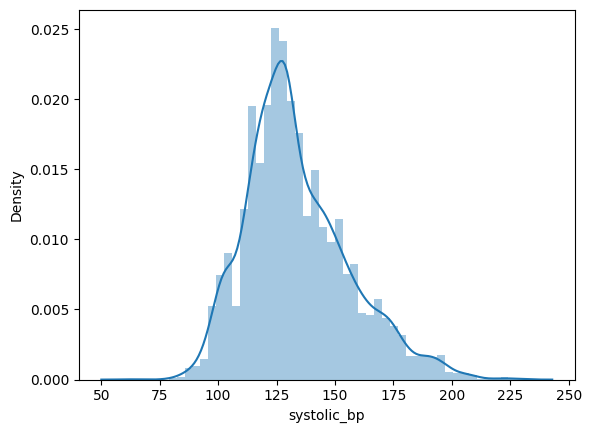

In [27]:
sns.distplot(df_noiseless['systolic_bp'])

/tmp/ipykernel_369354/2012171143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['systolic_bp'])


<Axes: xlabel='systolic_bp', ylabel='Density'>

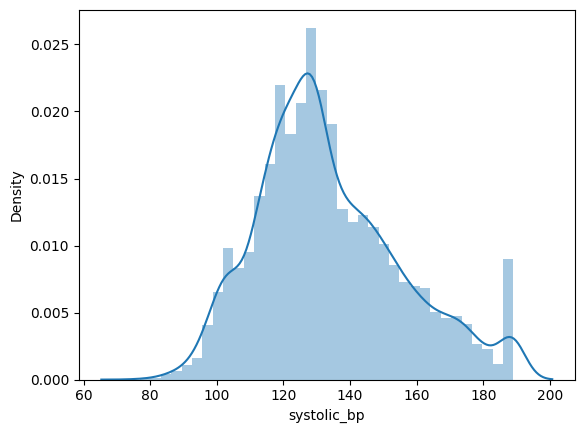

In [28]:
sns.distplot(df_cleaned['systolic_bp'])

<Axes: xlabel='systolic_bp'>

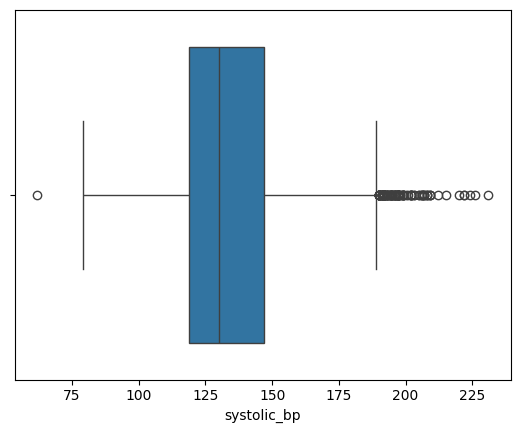

In [29]:
sns.boxplot(df_noiseless['systolic_bp'], orient='h')

<Axes: xlabel='systolic_bp'>

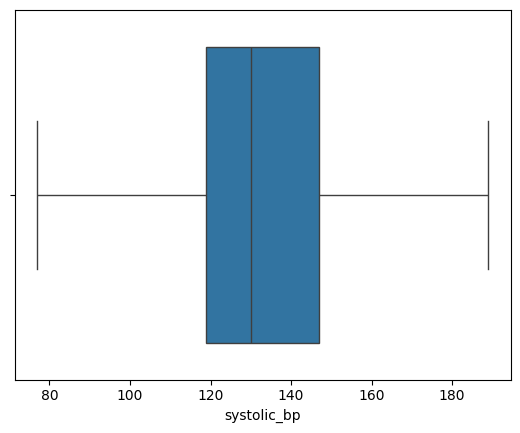

In [30]:
sns.boxplot(df_cleaned['systolic_bp'],orient = 'h')

# Detecting and Capping the Outliers for diastolic_bp

In [31]:
df_noiseless.sort_values(by='diastolic_bp', ascending=True).head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
4073   47    Male          59           86            45     5.63    1.42   
3247   65  Female          73          100            47    14.40    1.50   
4128   43  Female          85           97            47     6.00    1.60   
4135   35    Male          70          148            47     9.00    1.60   
2459   35  Female          77           87            47     7.47    1.47   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
4073    44.1  21.80                0             0                    0   
3247    45.0  20.04                0             0                    0   
4128    45.0  17.58                0             1                    0   
4135    55.0  21.48                0             0                    0   
2459    40.6  18.71                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
4073                       0       0         0  
3247                       0       0         0  
4128                       0       0         1  
4135                       0       0         0  
2459                       0       0         0

In [32]:
# diastolic_bp

Q1 = df_noiseless['diastolic_bp'].quantile(0.25)
Q3 =  df_noiseless['diastolic_bp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_dbp = Q1 - 1.5 * IQR
upper_bound_dbp = Q3 + 1.5 * IQR

print(lower_bound_dbp)
print(upper_bound_dbp)

47.5
115.5


In [33]:
df_noiseless['diastolic_bp'].describe()

count    5386.000000
mean       82.051244
std        12.505997
min        45.000000
25%        73.000000
50%        81.000000
75%        90.000000
max       119.000000
Name: diastolic_bp, dtype: float64

In [34]:
df_cleaned['diastolic_bp'] = df_noiseless['diastolic_bp'].clip(lower=lower_bound_dbp, upper=upper_bound_dbp)
df_cleaned['diastolic_bp'].describe()


count    5386.000000
mean       82.033234
std        12.451142
min        47.500000
25%        73.000000
50%        81.000000
75%        90.000000
max       115.500000
Name: diastolic_bp, dtype: float64

/tmp/ipykernel_369354/3474295168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noiseless['diastolic_bp'])


<Axes: xlabel='diastolic_bp', ylabel='Density'>

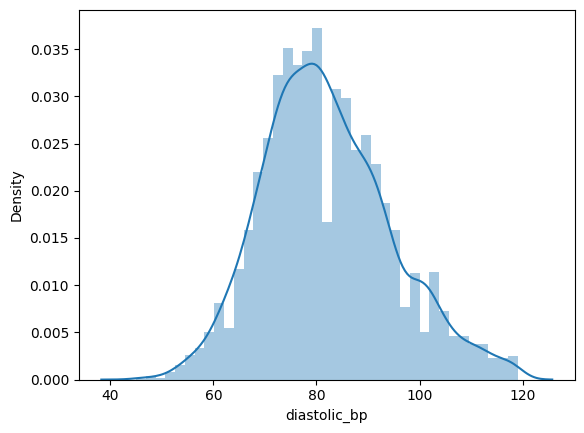

In [35]:
sns.distplot(df_noiseless['diastolic_bp'])

/tmp/ipykernel_369354/464896516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['diastolic_bp'])


<Axes: xlabel='diastolic_bp', ylabel='Density'>

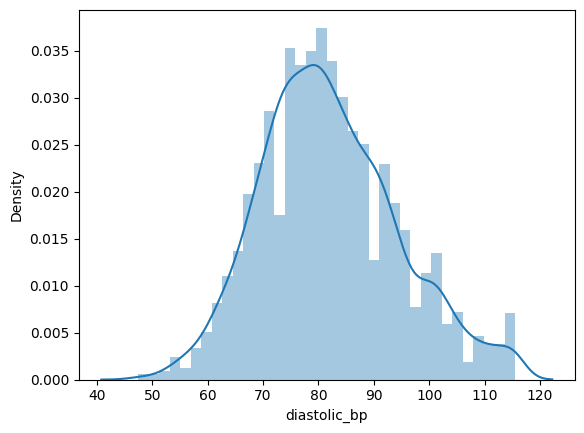

In [36]:
sns.distplot(df_cleaned['diastolic_bp'])

<Axes: xlabel='diastolic_bp'>

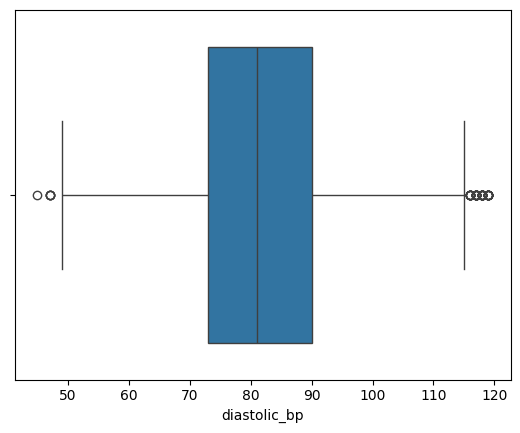

In [37]:
sns.boxplot(df_noiseless['diastolic_bp'], orient='h')

<Axes: xlabel='diastolic_bp'>

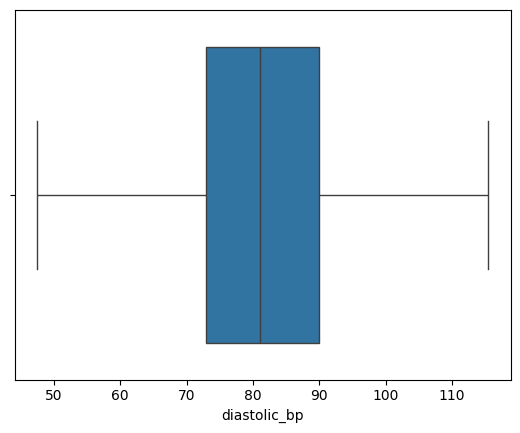

In [38]:
sns.boxplot(df_cleaned['diastolic_bp'],orient = 'h')

# Detecting and Capping the Outliers for glucose

In [39]:
df_noiseless.sort_values(by='glucose', ascending=True).head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
2554   36  Female          85          120            80     2.00    1.52   
4027   25    Male          59          114            70     2.04    1.52   
2597   30  Female          88          185           108     2.77    1.50   
950    30  Female          74          150            87     2.77    1.52   
341    36  Female          69          121            88     2.86    1.52   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
2554    62.0  26.84                0             0                    0   
4027    47.8  20.58                0             0                    0   
2597    60.6  26.98                0             0                    0   
950     45.8  19.72                0             0                    0   
341     51.2  22.04                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
2554                       0       0         0  
4027                       0       0         0  
2597                       0       0         0  
950                        0       0         0  
341                        0       0         0

In [40]:
# glucose

Q1 = df_noiseless['glucose'].quantile(0.25)
Q3 =  df_noiseless['glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_g = Q1 - 1.5 * IQR
upper_bound_g = Q3 + 1.5 * IQR

print(lower_bound_g)
print(upper_bound_g)

2.820000000000001
11.299999999999997


In [41]:
df_noiseless['glucose'].describe()

count    5386.000000
mean        7.563754
std         2.843382
min         2.000000
25%         6.000000
50%         6.925000
75%         8.120000
max        30.000000
Name: glucose, dtype: float64

In [42]:

df_cleaned['glucose'] = df_noiseless['glucose'].clip(lower=lower_bound_g, upper=upper_bound_g)
df_cleaned['glucose'].describe()


count    5386.000000
mean        7.258554
std         1.775239
min         2.820000
25%         6.000000
50%         6.925000
75%         8.120000
max        11.300000
Name: glucose, dtype: float64

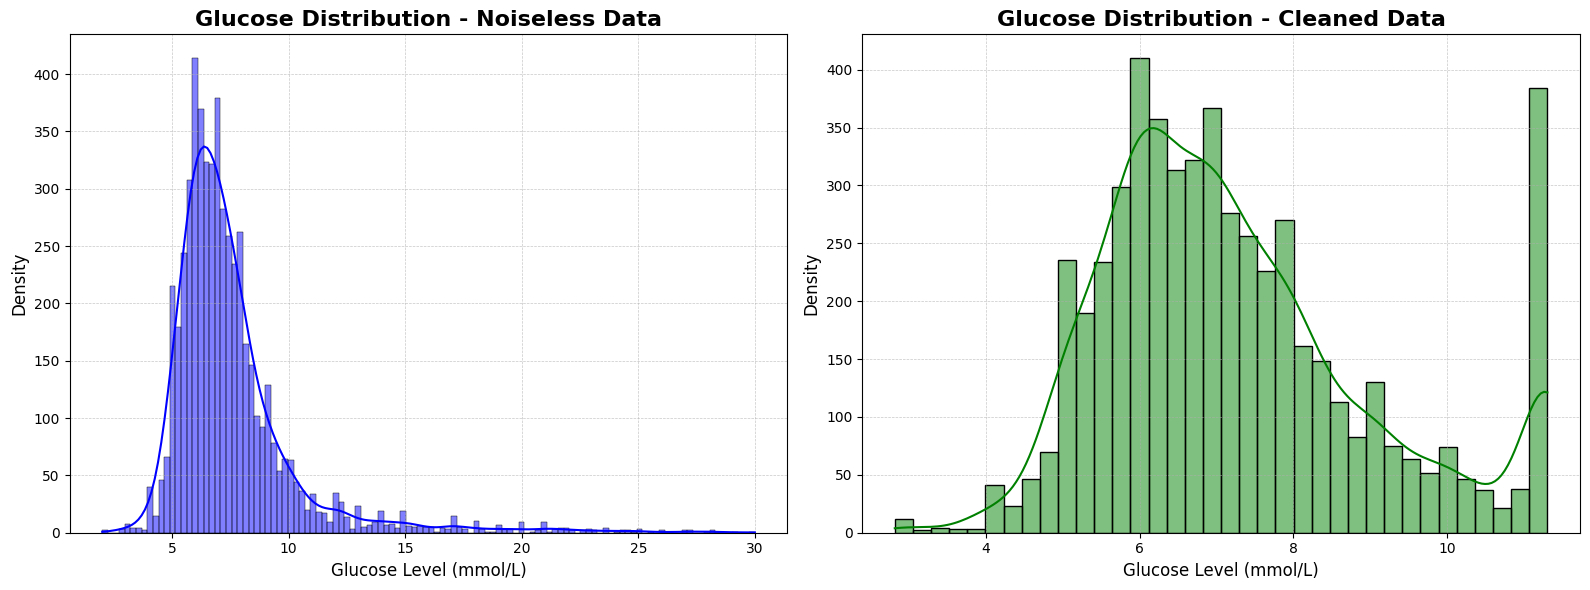

In [43]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

sns.histplot(df_noiseless['glucose'], kde=True, color='blue', ax=axes[0])
axes[0].set_title('Glucose Distribution - Noiseless Data', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Glucose Level (mmol/L)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

sns.histplot(df_cleaned['glucose'], kde=True, color='green', ax=axes[1])
axes[1].set_title('Glucose Distribution - Cleaned Data', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Glucose Level (mmol/L)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


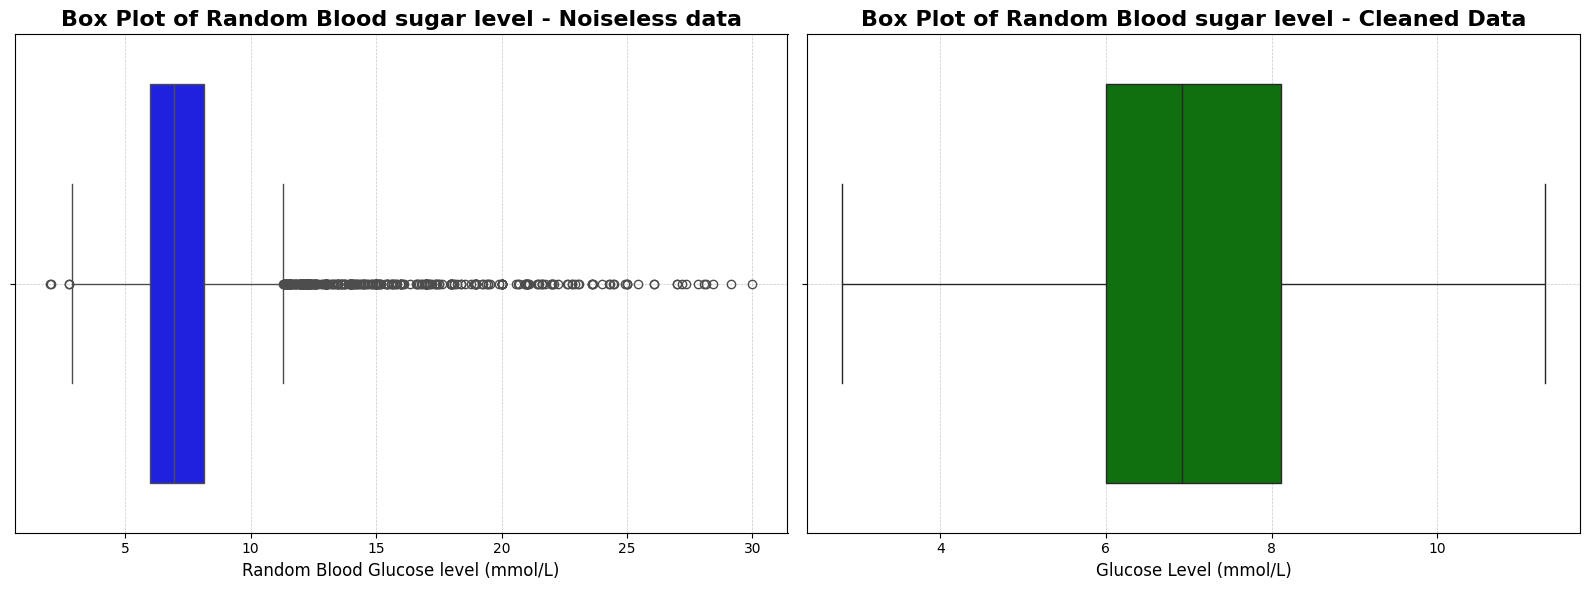

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data = df_noiseless, x='glucose', orient='h', ax = axes[0], color='blue')
axes[0].set_title('Box Plot of Random Blood sugar level - Noiseless data', fontsize= 16, fontweight ='bold' )
axes[0].set_xlabel('Random Blood Glucose level (mmol/L)', fontsize = 12)
axes[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

sns.boxplot(data=df_cleaned, x='glucose', orient='h', ax=axes[1], color='green')
axes[1].set_title('Box Plot of Random Blood sugar level - Cleaned Data', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Glucose Level (mmol/L)', fontsize=12)
axes[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Detecting and Capping the Outliers for height

In [45]:
df_noiseless.sort_values(by='height', ascending=True).head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
3741   50  Female          80          136            81     5.00    1.19   
3740   50  Female          81          124            90    15.00    1.19   
3746   63  Female          72          142            90    15.00    1.19   
5373   35  Female          84          149           101     7.20    1.22   
2363   65  Female          67          196           108     6.25    1.22   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
3741    55.0  38.84                0             0                    0   
3740    55.0  38.84                0             0                    0   
3746    60.0  42.37                0             1                    0   
5373    59.0  39.69                0             0                    0   
2363    72.0  48.44                0             1                    0   

      cardiovascular_disease  stroke  diabetic  
3741                       0       0         0  
3740                       0       0         0  
3746                       0       0         1  
5373                       0       0         0  
2363                       0       0         0

In [46]:
# height

Q1 = df_noiseless['height'].quantile(0.25)
Q3 =  df_noiseless['height'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_h = Q1 - 1.5 * IQR
upper_bound_h = Q3 + 1.5 * IQR

print(lower_bound_h)
print(upper_bound_h)

1.4
1.7200000000000002


In [47]:
df_noiseless['height'].describe()

count    5386.000000
mean        1.549720
std         0.076742
min         1.190000
25%         1.520000
50%         1.550000
75%         1.600000
max         1.960000
Name: height, dtype: float64

In [48]:
df_cleaned['height'] = df_noiseless['height'].clip(lower=lower_bound_h, upper=upper_bound_h)
df_cleaned['height'].describe()


count    5386.000000
mean        1.550663
std         0.069915
min         1.400000
25%         1.520000
50%         1.550000
75%         1.600000
max         1.720000
Name: height, dtype: float64

/tmp/ipykernel_369354/1321416986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noiseless['height'])


<Axes: xlabel='height', ylabel='Density'>

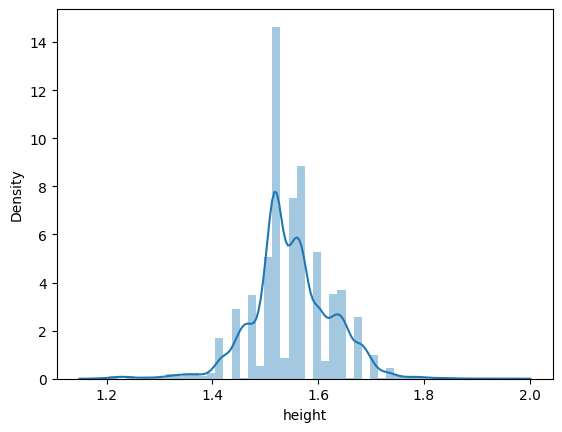

In [49]:
sns.distplot(df_noiseless['height'])

/tmp/ipykernel_369354/1657749177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['height'])


<Axes: xlabel='height', ylabel='Density'>

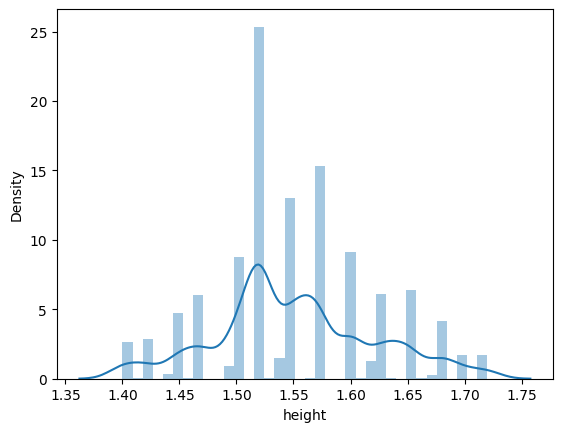

In [50]:
sns.distplot(df_cleaned['height'])

<Axes: xlabel='height'>

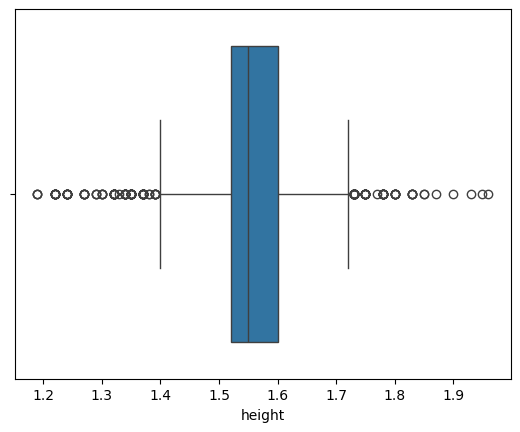

In [51]:
sns.boxplot(df_noiseless['height'], orient='h')

<Axes: xlabel='height'>

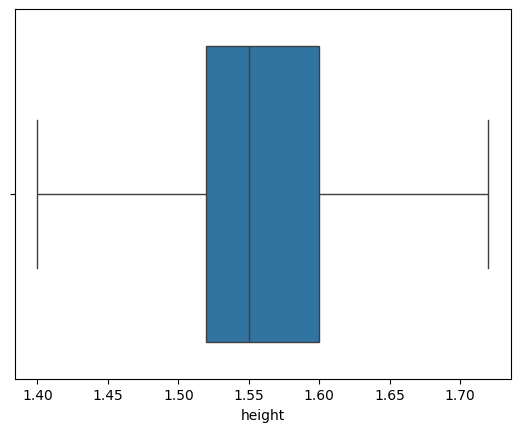

In [52]:
sns.boxplot(df_cleaned['height'],orient = 'h')

# Detecting and Capping the Outliers for weight

In [53]:
df_noiseless.sort_values(by='weight', ascending=False).head(20)

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
2028   70    Male          73          157           107     6.80    1.93   
3061   30  Female          78          105            72     9.82    1.52   
3477   28  Female          84          121            96    14.49    1.35   
5382   28  Female          82          142            83     5.75    1.52   
1492   27  Female          74          121            79     4.48    1.57   
21     35  Female          66          152            81     5.08    1.57   
5119   45  Female          88          128            89     8.14    1.52   
3552   65  Female          69          166            98     5.67    1.60   
3129   70  Female          85          131            77     9.89    1.45   
4831   35  Female          77          149            99     7.29    1.55   
2785   19  Female          66          149            88     5.34    1.63   
1175   27  Female          90          134            84     6.00    1.65   
1379   30  Female          86          122            83     7.29    1.55   
1488   26    Male          75          130            81     7.87    1.70   
3661   70    Male          59          188            99     6.20    1.50   
3950   22    Male          73          151            98    12.57    1.65   
672    33  Female          86          156           112     7.14    1.55   
5171   29  Female          73          139            92     5.66    1.60   
4761   70    Male          60          191            86     8.16    1.65   
359    37  Female          82          177           111     6.64    1.47   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
2028   100.7  27.02                0             0                    0   
3061    98.5  42.41                0             0                    0   
3477    98.0  54.08                1             0                    1   
5382    97.0  41.76                0             0                    0   
1492    95.4  38.47                0             0                    0   
21      94.9  38.27                0             0                    0   
5119    94.5  40.69                0             0                    0   
3552    92.1  35.97                1             0                    1   
3129    92.1  43.94                0             0                    0   
4831    90.8  37.82                0             0                    0   
2785    90.4  34.21                0             0                    0   
1175    90.0  33.06                0             0                    0   
1379    90.0  37.49                0             0                    0   
1488    89.9  31.04                0             0                    0   
3661    89.7  39.94                0             1                    0   
3950    88.2  32.36                0             0                    0   
672     87.4  36.41                0             1                    0   
5171    86.9  33.94                0             0                    0   
4761    86.0  31.55                0             1                    0   
359     85.7  39.49                0             1                    0   

      cardiovascular_disease  stroke  diabetic  
2028                       0       0         0  
3061                       0       0         0  
3477                       0       0         0  
5382                       0       0         0  
1492                       0       0         0  
21                         0       0         0  
5119                       0       0         0  
3552                       0       0         0  
3129                       0       0         0  
4831                       0       0         0  
2785                       0       0         0  
1175                       0       0         0  
1379                       0       0         0  
1488                       0       0         0  
3661                       0       0         0  
3950                       0

In [54]:
# # weight

# Q1 = df_noiseless['weight'].quantile(0.25)
# Q3 =  df_noiseless['weight'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound_w = Q1 - 1.5 * IQR
# upper_bound_w = Q3 + 1.5 * IQR

# print(lower_bound_w)
# print(upper_bound_w)

In [55]:
# Percentile Method
upper_limit = df_noiseless['weight'].quantile(0.99)
lower_limit = df_noiseless['weight'].quantile(0.01)
print(upper_limit)
print(lower_limit)

81.41499999999996
33.8


In [56]:
df_noiseless['weight'].describe()

count    5386.000000
mean       53.703063
std        10.011741
min        30.000000
25%        46.825000
50%        53.000000
75%        60.000000
max       100.700000
Name: weight, dtype: float64

In [57]:
# df_cleaned['weight'] = df_noiseless['weight'].clip(lower=lower_bound_w, upper=upper_bound_w)
# df_cleaned['weight'].describe()


In [58]:
df_cleaned['weight'] = df_noiseless['weight'].clip(lower=lower_limit, upper=upper_limit)
df_cleaned['weight'].describe()

count    5386.000000
mean       53.669163
std         9.808054
min        33.800000
25%        46.825000
50%        53.000000
75%        60.000000
max        81.415000
Name: weight, dtype: float64

/tmp/ipykernel_369354/2601162925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_noiseless['weight'])


<Axes: xlabel='weight', ylabel='Density'>

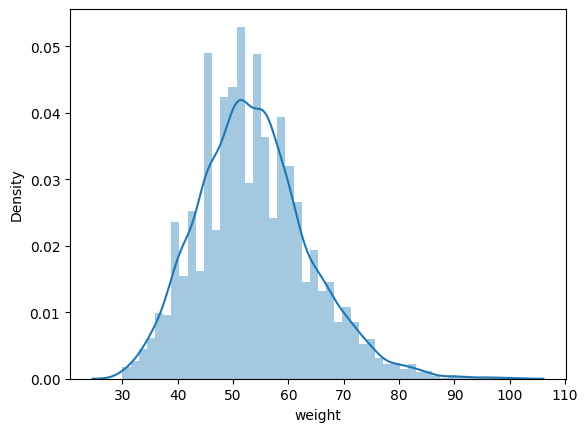

In [59]:
sns.distplot(df_noiseless['weight'])

/tmp/ipykernel_369354/3495987617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['weight'])


<Axes: xlabel='weight', ylabel='Density'>

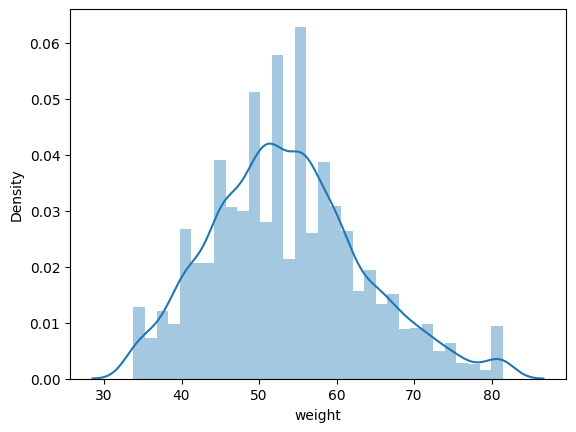

In [60]:
sns.distplot(df_cleaned['weight'])

<Axes: xlabel='weight'>

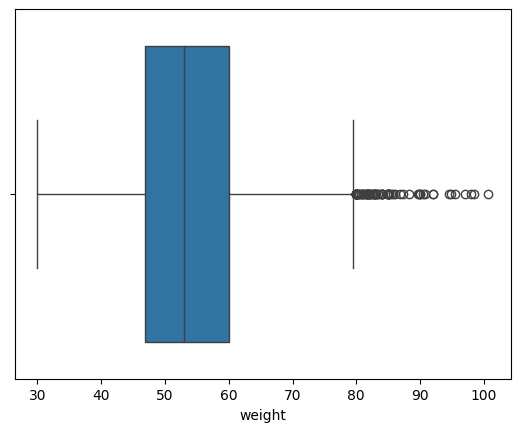

In [61]:
sns.boxplot(df_noiseless['weight'], orient='h')

<Axes: xlabel='weight'>

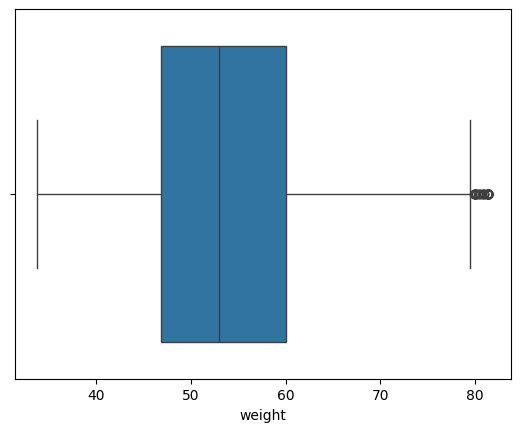

In [62]:
sns.boxplot(df_cleaned['weight'],orient = 'h')

# Dropping the 'bmi' column and recalculating it

In [63]:
df_noiseless.sort_values(by='bmi', ascending=True).head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
3407   30  Female          96           86            63     6.31    1.57   
3210   65  Female          97          166            92     8.14    1.63   
102    35  Female          79          116            74     5.17    1.63   
3557   45  Female          69          130            84     5.15    1.52   
1872   75    Male          75          100            64     5.78    1.68   

      weight    bmi  family_diabetes  hypertensive  family_hypertension  \
3407    30.0  12.10                0             0                    0   
3210    32.0  12.11                0             0                    0   
102     33.0  12.49                0             0                    0   
3557    30.0  12.92                0             0                    0   
1872    36.9  13.13                0             0                    0   

      cardiovascular_disease  stroke  diabetic  
3407                       0       0         0  
3210                       0       0         0  
102                        0       0         0  
3557                       0       0         0  
1872                       0       0         0

In [64]:
df_cleaned = df_cleaned.drop('bmi', axis =1)


In [65]:
df_cleaned.head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42  Female        66.0          110          73.0     5.88    1.65   
1   35  Female        60.0          125          68.0     5.71    1.47   
2   62  Female        57.0          127          74.0     6.85    1.52   
3   73    Male        55.0          189         112.0     6.28    1.63   
4   68  Female        71.0          150          81.0     5.71    1.42   

   weight  family_diabetes  hypertensive  family_hypertension  \
0    70.2                0             0                    0   
1    42.5                0             0                    0   
2    47.0                0             0                    0   
3    57.4                0             0                    0   
4    36.0                0             0                    0   

   cardiovascular_disease  stroke  diabetic  
0                       0       0         0  
1                       0       0         0  
2                       0       0         0  
3                       0       0         0  
4                       0       0         0

# Creating new measured 'BMI' column and restricting to 2 decimal points

In [66]:
df_cleaned['BMI'] = df_cleaned['weight'] / (df_cleaned['height'] ** 2)
df_cleaned['BMI'] = df_cleaned['BMI'].round(2)
df_cleaned.head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42  Female        66.0          110          73.0     5.88    1.65   
1   35  Female        60.0          125          68.0     5.71    1.47   
2   62  Female        57.0          127          74.0     6.85    1.52   
3   73    Male        55.0          189         112.0     6.28    1.63   
4   68  Female        71.0          150          81.0     5.71    1.42   

   weight  family_diabetes  hypertensive  family_hypertension  \
0    70.2                0             0                    0   
1    42.5                0             0                    0   
2    47.0                0             0                    0   
3    57.4                0             0                    0   
4    36.0                0             0                    0   

   cardiovascular_disease  stroke  diabetic    BMI  
0                       0       0         0  25.79  
1                       0       0         0  19.67  
2                       0       0         0  20.34  
3                       0       0         0  21.60  
4                       0       0         0  17.85

<Axes: xlabel='bmi'>

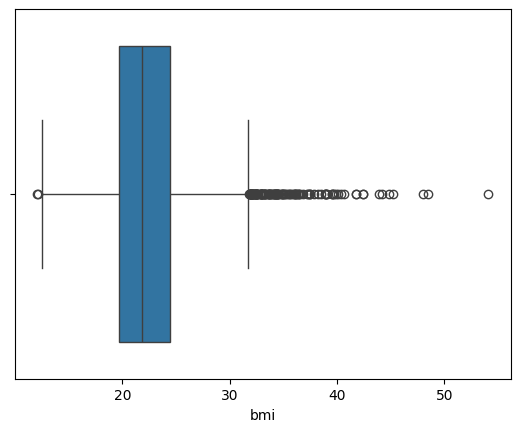

In [67]:
sns.boxplot(df_noiseless['bmi'], orient='h')

<Axes: xlabel='BMI'>

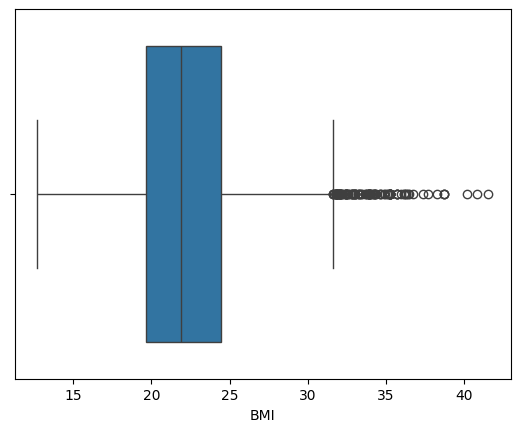

In [68]:
sns.boxplot(df_cleaned['BMI'],orient = 'h')

# Checking the cleaned data

In [69]:
df_cleaned.describe()

age   pulse_rate  systolic_bp  diastolic_bp      glucose  \
count  5386.000000  5386.000000  5386.000000   5386.000000  5386.000000   
mean     45.493316    76.728463   133.608429     82.033234     7.258554   
std      14.257717    11.818369    21.682615     12.451142     1.775239   
min       8.000000    46.500000    77.000000     47.500000     2.820000   
25%      35.000000    69.000000   119.000000     73.000000     6.000000   
50%      45.000000    76.000000   130.000000     81.000000     6.925000   
75%      55.000000    84.000000   147.000000     90.000000     8.120000   
max     112.000000   106.500000   189.000000    115.500000    11.300000   

            height       weight  family_diabetes  hypertensive  \
count  5386.000000  5386.000000      5386.000000   5386.000000   
mean      1.550663    53.669163         0.037319      0.110100   
std       0.069915     9.808054         0.189560      0.313044   
min       1.400000    33.800000         0.000000      0.000000   
25%       1.520000    46.825000         0.000000      0.000000   
50%       1.550000    53.000000         0.000000      0.000000   
75%       1.600000    60.000000         0.000000      0.000000   
max       1.720000    81.415000         1.000000      1.000000   

       family_hypertension  cardiovascular_disease       stroke     diabetic  \
count          5386.000000             5386.000000  5386.000000  5386.000000   
mean              0.039547                0.011697     0.003713     0.063684   
std               0.194910                0.107528     0.060830     0.244211   
min               0.000000                0.000000     0.000000     0.000000   
25%               0.000000                0.000000     0.000000     0.000000   
50%               0.000000                0.000000     0.000000     0.000000   
75%               0.000000                0.000000     0.000000     0.000000   
max               1.000000                1.000000     1.000000     1.000000   

               BMI  
count  5386.000000  
mean     22.318099  
std       3.864863  
min      12.720000  
25%      19.650000  
50%      21.885000  
75%      24.440000  
max      41.540000

In [70]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5386 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5386 non-null   int64  
 1   gender                  5386 non-null   object 
 2   pulse_rate              5386 non-null   float64
 3   systolic_bp             5386 non-null   int64  
 4   diastolic_bp            5386 non-null   float64
 5   glucose                 5386 non-null   float64
 6   height                  5386 non-null   float64
 7   weight                  5386 non-null   float64
 8   family_diabetes         5386 non-null   int64  
 9   hypertensive            5386 non-null   int64  
 10  family_hypertension     5386 non-null   int64  
 11  cardiovascular_disease  5386 non-null   int64  
 12  stroke                  5386 non-null   int64  
 13  diabetic                5386 non-null   int64  
 14  BMI                     5386 non-null   float

# Binary Feature Analysis

In [71]:
df_cleaned.head()

age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42  Female        66.0          110          73.0     5.88    1.65   
1   35  Female        60.0          125          68.0     5.71    1.47   
2   62  Female        57.0          127          74.0     6.85    1.52   
3   73    Male        55.0          189         112.0     6.28    1.63   
4   68  Female        71.0          150          81.0     5.71    1.42   

   weight  family_diabetes  hypertensive  family_hypertension  \
0    70.2                0             0                    0   
1    42.5                0             0                    0   
2    47.0                0             0                    0   
3    57.4                0             0                    0   
4    36.0                0             0                    0   

   cardiovascular_disease  stroke  diabetic    BMI  
0                       0       0         0  25.79  
1                       0       0         0  19.67  
2                       0       0         0  20.34  
3                       0       0         0  21.60  
4                       0       0         0  17.85

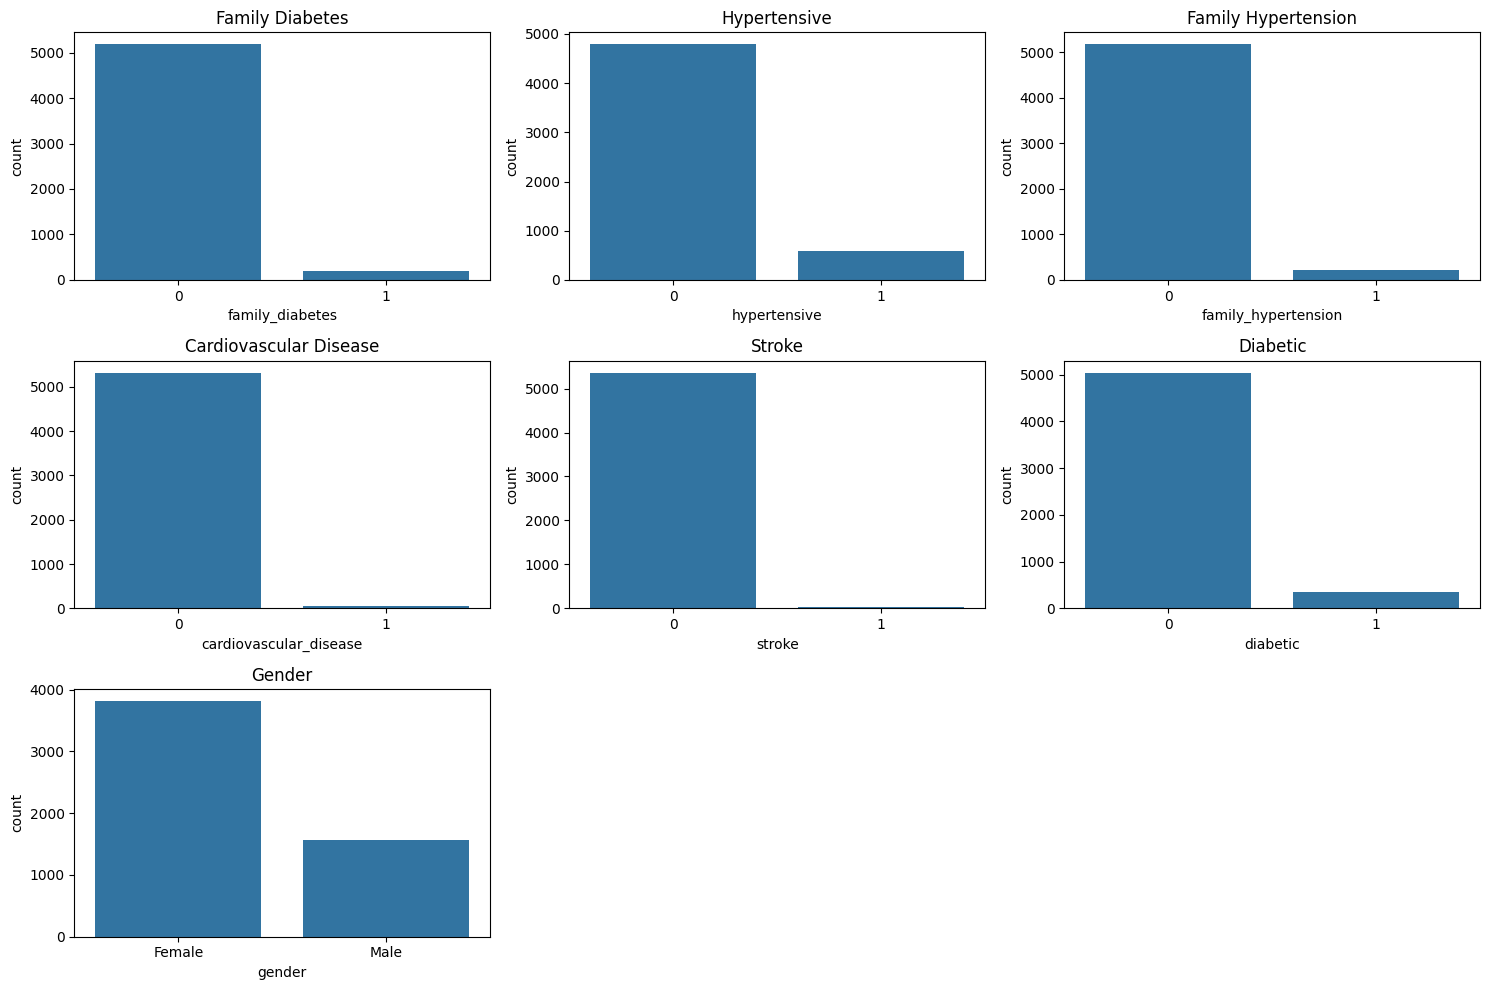

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()

sns.countplot(data=df_cleaned, x='family_diabetes', ax=axes[0])
axes[0].set_title('Family Diabetes')

sns.countplot(data=df_cleaned, x='hypertensive', ax=axes[1])
axes[1].set_title('Hypertensive')

sns.countplot(data=df_cleaned, x='family_hypertension', ax=axes[2])
axes[2].set_title('Family Hypertension')

sns.countplot(data=df_cleaned, x='cardiovascular_disease', ax=axes[3])
axes[3].set_title('Cardiovascular Disease')

sns.countplot(data=df_cleaned, x='stroke', ax=axes[4])
axes[4].set_title('Stroke')

sns.countplot(data=df_cleaned, x='diabetic', ax=axes[5])
axes[5].set_title('Diabetic')

sns.countplot(data=df_cleaned, x='gender', ax=axes[6])
axes[6].set_title('Gender')


axes[7].axis('off')
axes[8].axis('off')
plt.tight_layout()
plt.show()


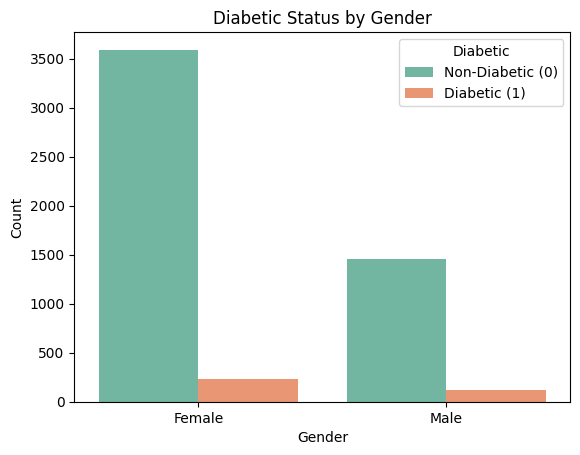

In [73]:
sns.countplot(data=df_cleaned, x='gender', hue='diabetic', palette='Set2')
plt.title('Diabetic Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.show()

# Box Plots for Continuous vs. Binary Variables

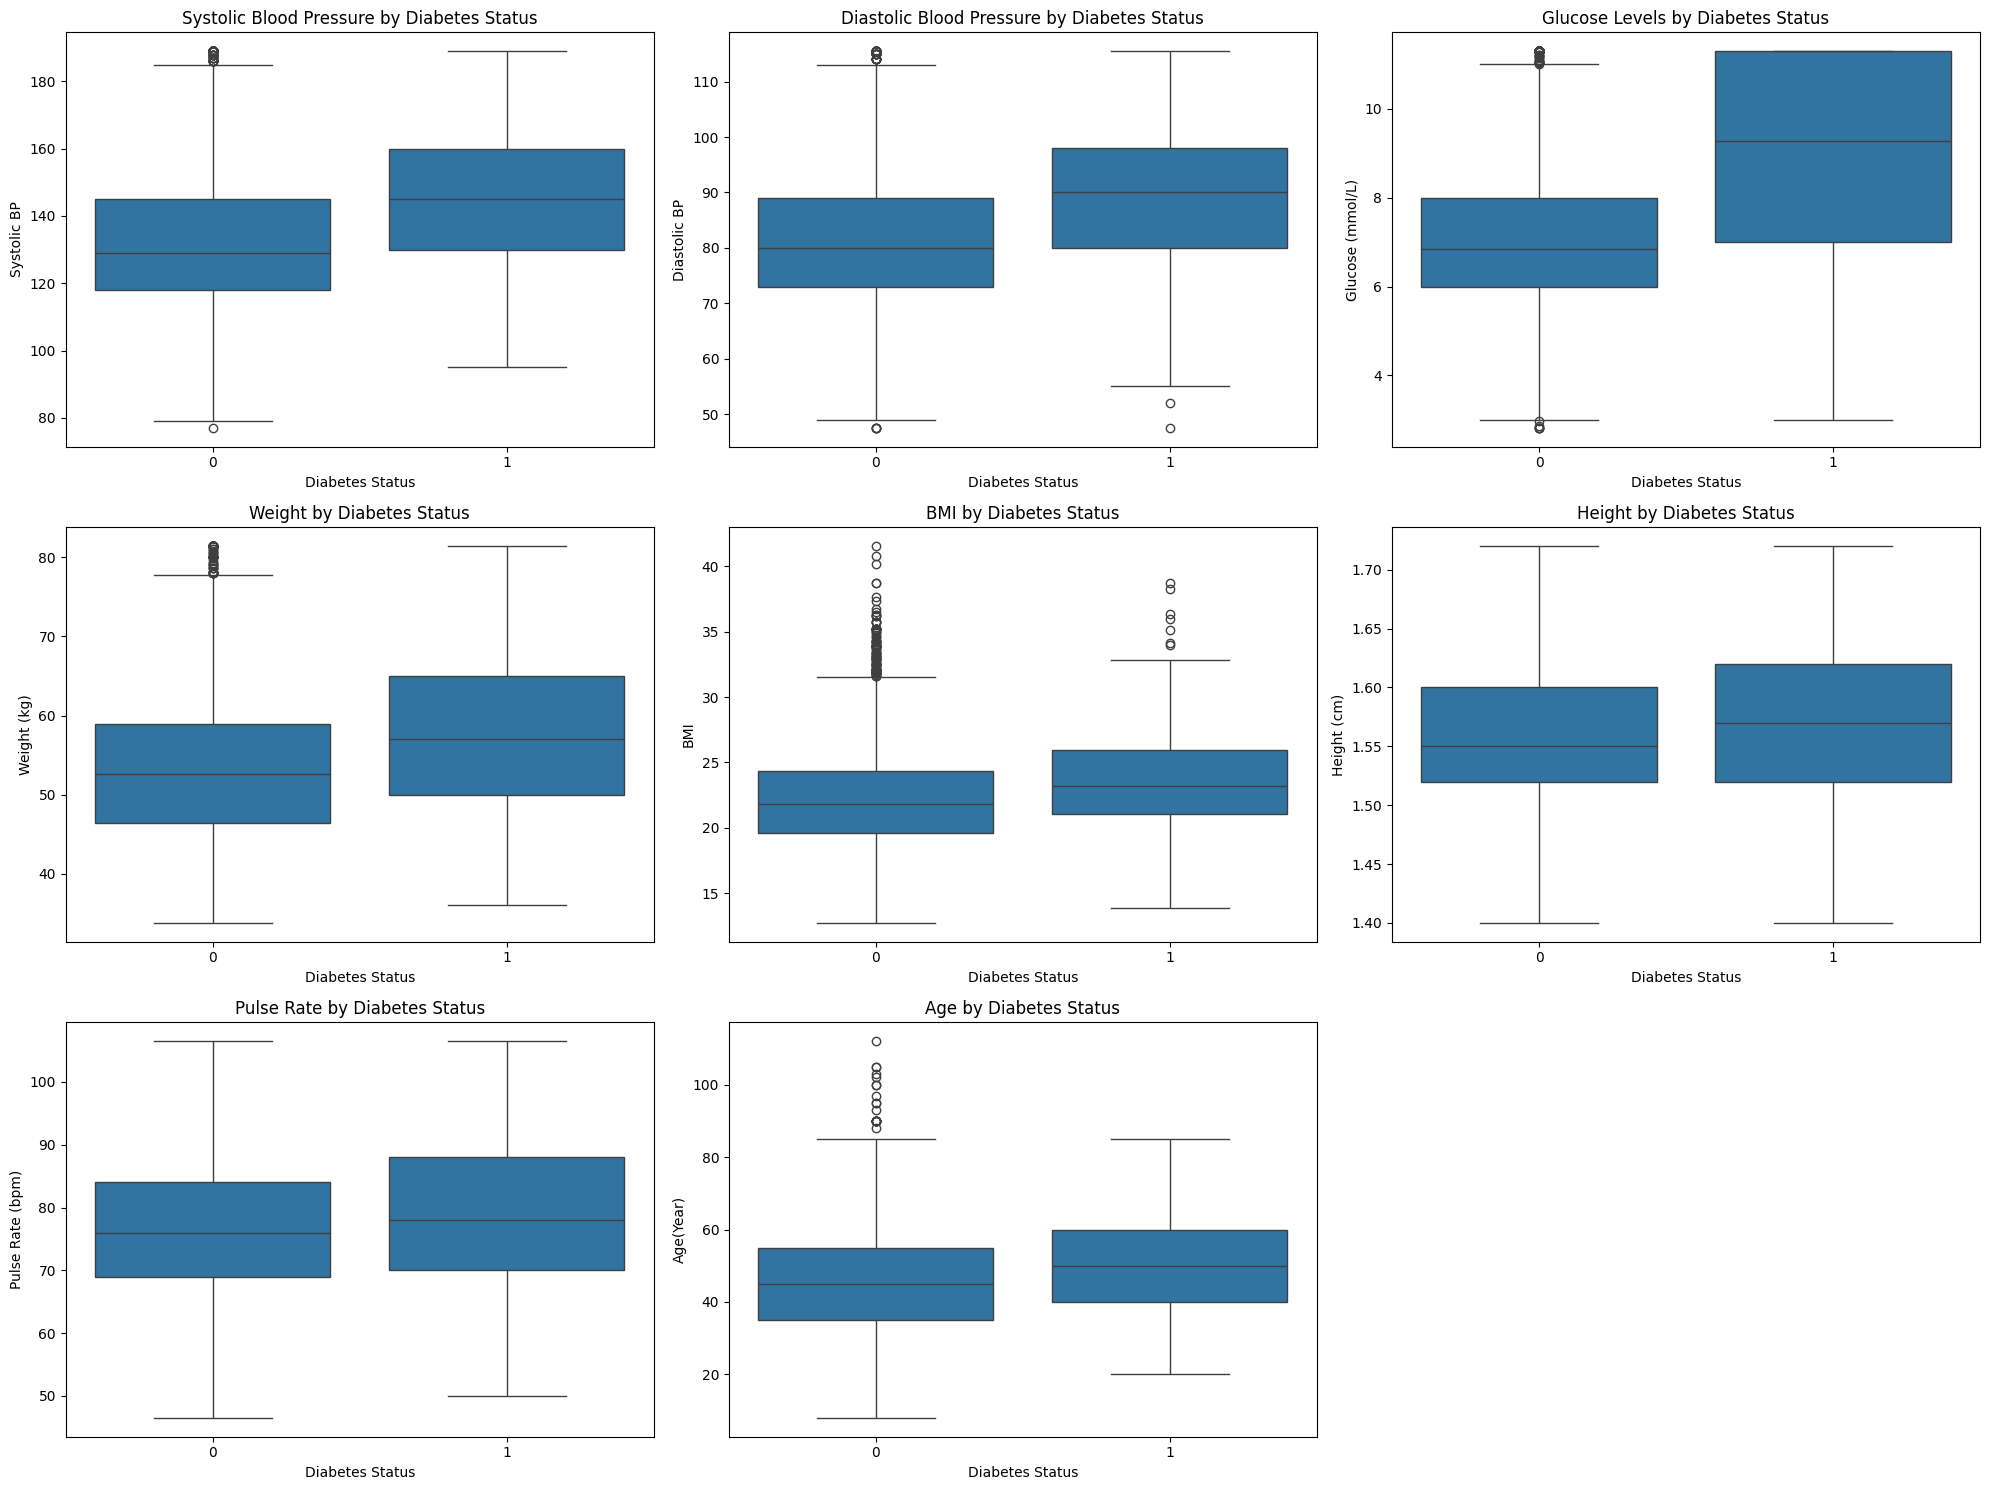

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 3, figsize=(20, 15))  
axes = axes.flatten()

sns.boxplot(data=df_cleaned, x='diabetic', y='systolic_bp', ax=axes[0])
axes[0].set_title('Systolic Blood Pressure by Diabetes Status')
axes[0].set_xlabel('Diabetes Status')
axes[0].set_ylabel('Systolic BP')

sns.boxplot(data=df_cleaned, x='diabetic', y='diastolic_bp', ax=axes[1])
axes[1].set_title('Diastolic Blood Pressure by Diabetes Status')
axes[1].set_xlabel('Diabetes Status')
axes[1].set_ylabel('Diastolic BP')

sns.boxplot(data=df_cleaned, x='diabetic', y='glucose', ax=axes[2])
axes[2].set_title('Glucose Levels by Diabetes Status')
axes[2].set_xlabel('Diabetes Status')
axes[2].set_ylabel('Glucose (mmol/L)')

sns.boxplot(data=df_cleaned, x='diabetic', y='weight', ax=axes[3])
axes[3].set_title('Weight by Diabetes Status')
axes[3].set_xlabel('Diabetes Status')
axes[3].set_ylabel('Weight (kg)')

sns.boxplot(data=df_cleaned, x='diabetic', y='BMI', ax=axes[4])
axes[4].set_title('BMI by Diabetes Status')
axes[4].set_xlabel('Diabetes Status')
axes[4].set_ylabel('BMI')

sns.boxplot(data=df_cleaned, x='diabetic', y='height', ax=axes[5])
axes[5].set_title('Height by Diabetes Status')
axes[5].set_xlabel('Diabetes Status')
axes[5].set_ylabel('Height (cm)')

sns.boxplot(data=df_cleaned, x='diabetic', y='pulse_rate', ax=axes[6])
axes[6].set_title('Pulse Rate by Diabetes Status')
axes[6].set_xlabel('Diabetes Status')
axes[6].set_ylabel('Pulse Rate (bpm)')

sns.boxplot(data=df_cleaned, x='diabetic', y='age', ax=axes[7])
axes[7].set_title('Age by Diabetes Status')
axes[7].set_xlabel('Diabetes Status')
axes[7].set_ylabel('Age(Year)')


axes[8].axis('off')
plt.tight_layout()
plt.show()


count    5386.000000
mean       45.493316
std        14.257717
min         8.000000
25%        35.000000
50%        45.000000
75%        55.000000
max       112.000000
Name: age, dtype: float64

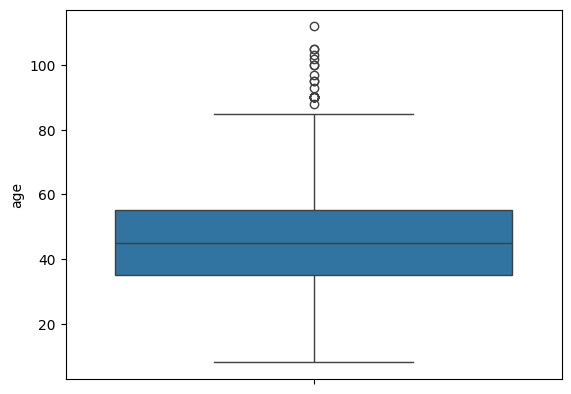

In [75]:
sns.boxplot(df_cleaned['age'])
df_cleaned['age'].describe()

#  Correlation of cleaned data using heatmap

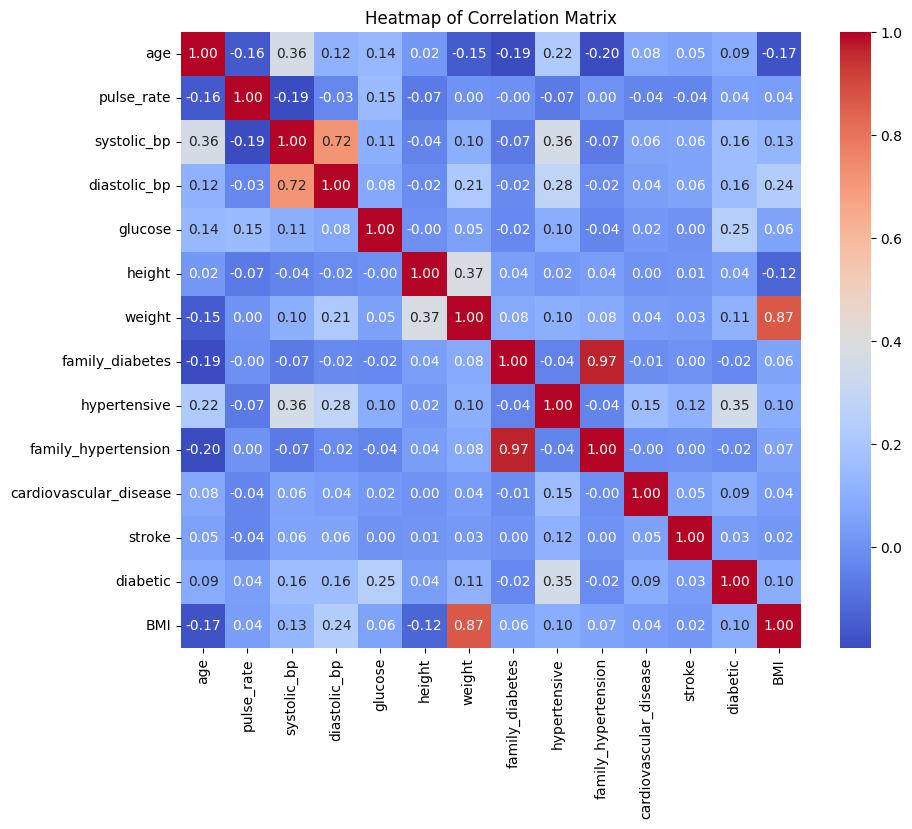

In [76]:
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])  
# Select only numeric columns

plt.figure(figsize=(10, 8))  
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Heatmap of Correlation Matrix")
plt.show()


# Glucose and hypertensive column shows strong positive correlation with being diabetic
# sys/dias bp and weight show some positive correlation with being diabetic
# age and cardiovascular_disease also shows very less correlation

#### Strong Correlation (|r| > 0.30)--------------------------hypertensive
#### Moderate Correlation (0.10 ≤ |r| ≤ 0.30)-----------------glucose, systolic_bp, diastolic_bp, Weight, BMI
#### Weak Correlation (0 < |r| < 0.10)------------------------Age, Pulse_Rate, height, Cardiovascular_disease, Stroke
#### No or Negligible Correlation (|r| ≈ 0)-------------------Family_diabtes, Family_hypertension

# Scatterplot between Blood Glucose level and Age

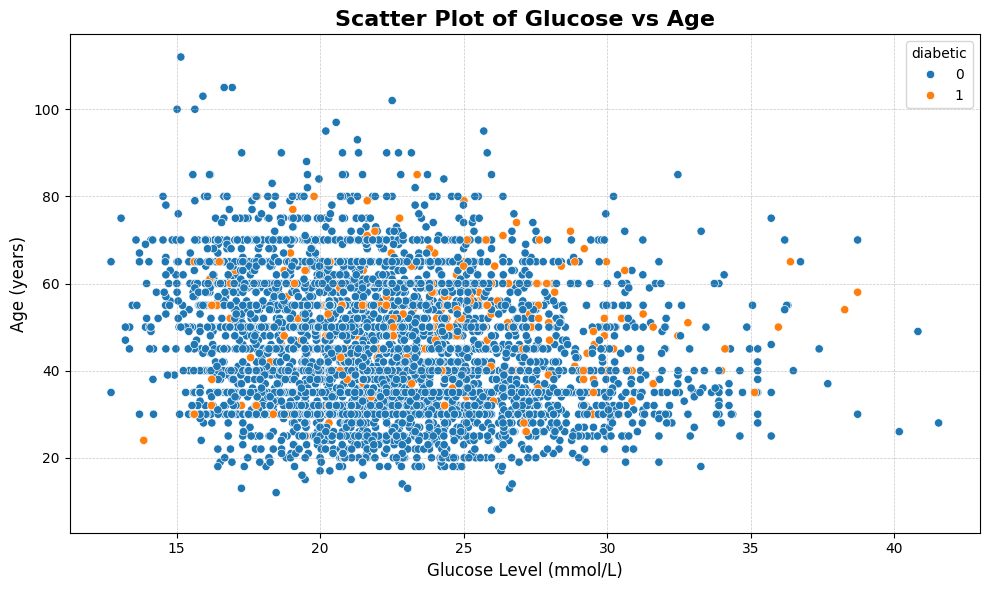

In [77]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df_cleaned['BMI'], y=df_cleaned['age'], hue=df_cleaned['diabetic'])
plt.title('Scatter Plot of Glucose vs Age', fontsize=16, fontweight='bold')
plt.xlabel('Glucose Level (mmol/L)', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# Scatterplot between Blood Glucose level and BMI

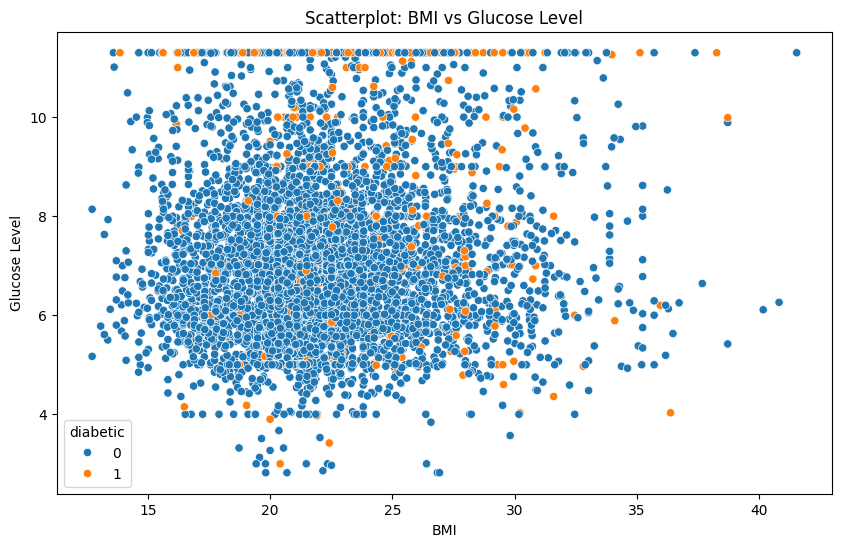

In [78]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['BMI'], y=df_cleaned['glucose'], hue=df_cleaned['diabetic'])
plt.title('Scatterplot: BMI vs Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.show()


# Pairplots

/home/students/shfnu/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


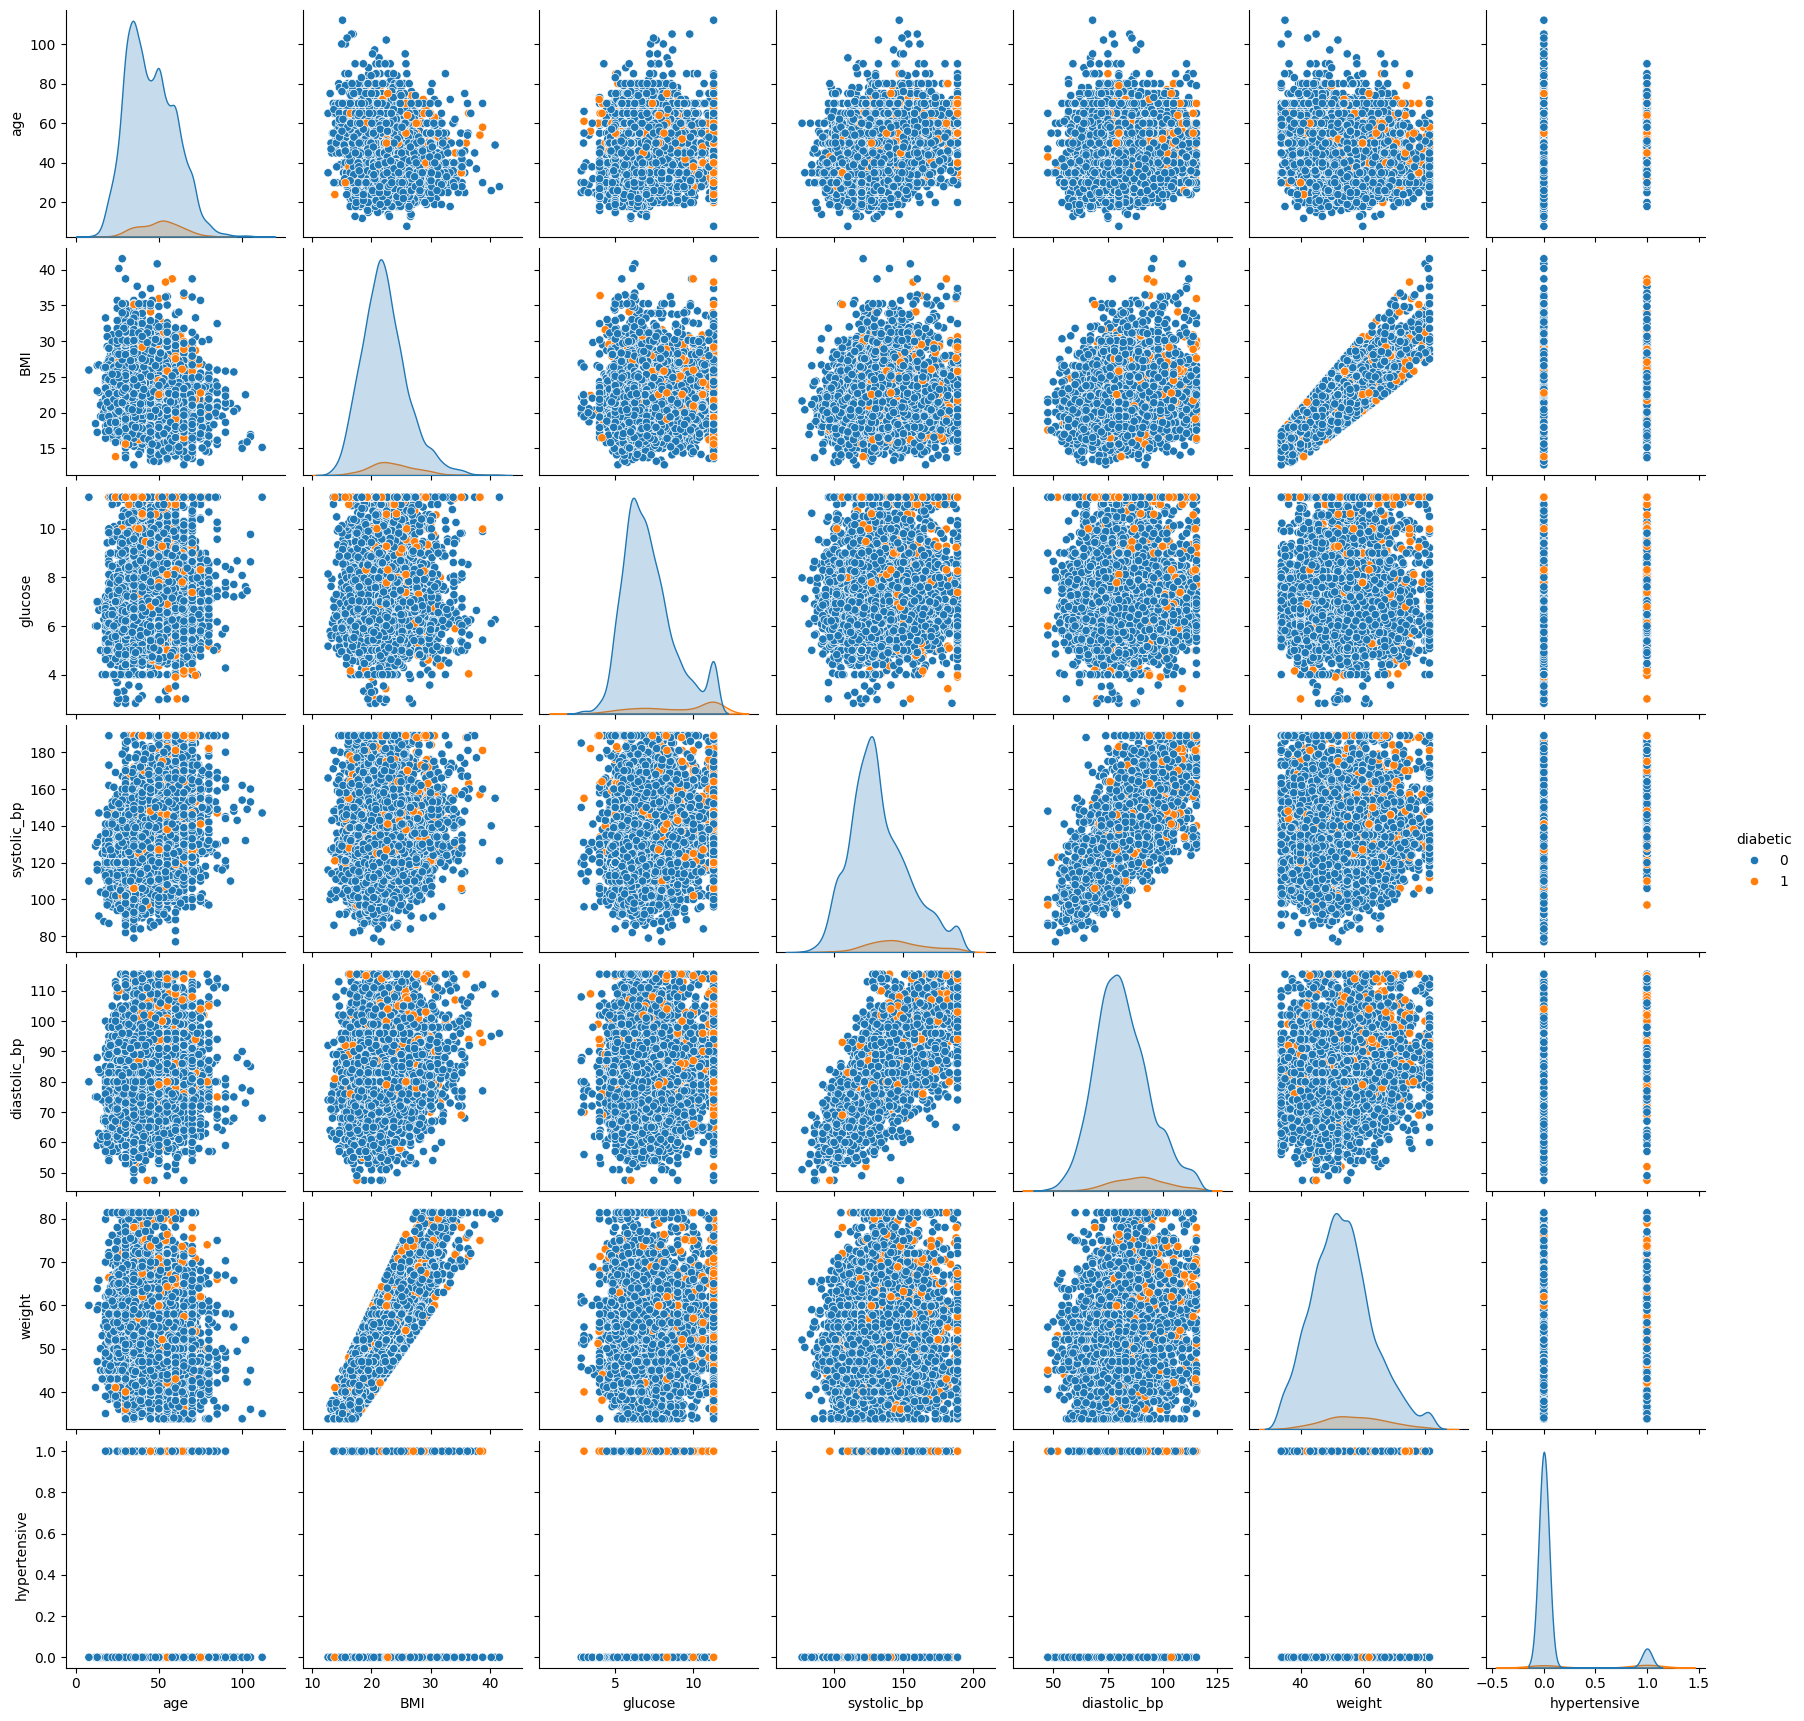

In [79]:
sns.pairplot(df_cleaned, vars=['age', 'BMI', 'glucose', 'systolic_bp', 'diastolic_bp','weight','hypertensive'], hue='diabetic')
plt.show()


# Shapiro-Wilk test

In [80]:
from scipy.stats import shapiro

stat, p = shapiro(df_cleaned['glucose'])
print(f"Shapiro-Wilk Test p-value: {p}")
if p < 0.05:
    print("Data is not normally distributed.")
else:
    print("Data is normally distributed.")



Shapiro-Wilk Test p-value: 3.60133705331478e-43
Data is not normally distributed.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [81]:
from scipy.stats import shapiro

for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Testing normality for: {column}")
    stat, p = shapiro(df_cleaned[column].dropna())  # Drop missing values if any
    print(f"Shapiro-Wilk Test p-value for {column}: {p}")
    
    if p < 0.05:
        print(f"{column}: Data is not normally distributed.\n")
    else:
        print(f"{column}: Data is normally distributed.\n")


Testing normality for: age
Shapiro-Wilk Test p-value for age: 1.6764780813122325e-28
age: Data is not normally distributed.

Testing normality for: pulse_rate
Shapiro-Wilk Test p-value for pulse_rate: 1.7430172851066313e-17
pulse_rate: Data is not normally distributed.

Testing normality for: systolic_bp
Shapiro-Wilk Test p-value for systolic_bp: 9.821555052179672e-33
systolic_bp: Data is not normally distributed.

Testing normality for: diastolic_bp
Shapiro-Wilk Test p-value for diastolic_bp: 6.720621343504398e-22
diastolic_bp: Data is not normally distributed.

Testing normality for: glucose
Shapiro-Wilk Test p-value for glucose: 3.60133705331478e-43
glucose: Data is not normally distributed.

Testing normality for: height
Shapiro-Wilk Test p-value for height: 1.0645847661103395e-30
height: Data is not normally distributed.

Testing normality for: weight
Shapiro-Wilk Test p-value for weight: 4.793637299509779e-23
weight: Data is not normally distributed.

Testing normality for: famil

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Our data is not normally distributed
#  Mann-Whitney U Test for Continuous Variables

In [82]:
from scipy.stats import mannwhitneyu

# List of continuous variables to test
continuous_columns = ['age', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 
                      'glucose', 'height', 'weight', 'BMI']

# Perform Mann-Whitney U Test for each continuous variable based on diabetic status (0/1)
for column in continuous_columns:
    print(f"Performing Mann-Whitney U Test for '{column}' and 'diabetic':")
    
    # Filter the data by diabetic status (1 for diabetic, 0 for non-diabetic)
    group1 = df_cleaned[df_cleaned['diabetic'] == 1][column].dropna()  # Diabetic group
    group2 = df_cleaned[df_cleaned['diabetic'] == 0][column].dropna()  # Non-diabetic group
    
    # Check if either group is empty
    if group1.empty or group2.empty:
        print(f"One of the groups is empty for {column}. Skipping Mann-Whitney U test.\n")
    else:
        # Perform the Mann-Whitney U Test
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        
        # Display the results
        print(f"Mann-Whitney U Test Statistic: {stat}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print(f"Result: Significant difference between 'Diabetic' and 'Non-Diabetic' in '{column}'.\n")
        else:
            print(f"Result: No significant difference between 'Diabetic' and 'Non-Diabetic' in '{column}'.\n")


Performing Mann-Whitney U Test for 'age' and 'diabetic':
Mann-Whitney U Test Statistic: 1067877.0
p-value: 2.972911621538193e-13
Result: Significant difference between 'Diabetic' and 'Non-Diabetic' in 'age'.

Performing Mann-Whitney U Test for 'pulse_rate' and 'diabetic':
Mann-Whitney U Test Statistic: 947829.5
p-value: 0.0029016270138239246
Result: Significant difference between 'Diabetic' and 'Non-Diabetic' in 'pulse_rate'.

Performing Mann-Whitney U Test for 'systolic_bp' and 'diabetic':
Mann-Whitney U Test Statistic: 1186884.5
p-value: 6.769393657796152e-31
Result: Significant difference between 'Diabetic' and 'Non-Diabetic' in 'systolic_bp'.

Performing Mann-Whitney U Test for 'diastolic_bp' and 'diabetic':
Mann-Whitney U Test Statistic: 1183859.0
p-value: 2.3287349784062394e-30
Result: Significant difference between 'Diabetic' and 'Non-Diabetic' in 'diastolic_bp'.

Performing Mann-Whitney U Test for 'glucose' and 'diabetic':
Mann-Whitney U Test Statistic: 1241252.0
p-value: 1.382

# Chi Square testing for categorical data

In [83]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical columns
categorical_columns = ['family_diabetes', 'hypertensive', 'family_hypertension', 
                       'cardiovascular_disease', 'stroke']

# Loop through each column to check association with 'diabetic'
for column in categorical_columns:
    print(f"Chi-Square Test for '{column}' and 'diabetic':")
    
    # Create a contingency table
    contingency_table = pd.crosstab(df_cleaned[column], df_cleaned['diabetic'])
    
    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display results
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    
    if p < 0.05:
        print(f"Result: Significant association between '{column}' and 'diabetic'.\n")
    else:
        print(f"Result: No significant association between '{column}' and 'diabetic'.\n")



Chi-Square Test for 'family_diabetes' and 'diabetic':
Chi-Square Statistic: 2.4349487171353994
p-value: 0.1186577754307487
Degrees of Freedom: 1
Expected Frequencies:
[[4854.80040847  330.19959153]
 [ 188.19959153   12.80040847]]
Result: No significant association between 'family_diabetes' and 'diabetic'.

Chi-Square Test for 'hypertensive' and 'diabetic':
Chi-Square Statistic: 665.7399719696336
p-value: 8.434118985823463e-147
Degrees of Freedom: 1
Expected Frequencies:
[[4487.76438916  305.23561084]
 [ 555.23561084   37.76438916]]
Result: Significant association between 'hypertensive' and 'diabetic'.

Chi-Square Test for 'family_hypertension' and 'diabetic':
Chi-Square Statistic: 1.354353573462737
p-value: 0.24451845883478246
Degrees of Freedom: 1
Expected Frequencies:
[[4843.56461196  329.43538804]
 [ 199.43538804   13.56461196]]
Result: No significant association between 'family_hypertension' and 'diabetic'.

Chi-Square Test for 'cardiovascular_disease' and 'diabetic':
Chi-Square St

In [84]:
df_cleaned.columns

Index(['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose',
       'height', 'weight', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke', 'diabetic',
       'BMI'],
      dtype='object')

# Extremely Imbalanced Target Data

In [89]:
# Check for any other non-standard categories
df_cleaned['diabetic'].value_counts()


diabetic
0    5043
1     343
Name: count, dtype: int64

 # Split Data into Features and Target

In [90]:
from sklearn.model_selection import train_test_split

X = df_cleaned[['age', 'gender', 'pulse_rate', 'glucose', 'hypertensive', 'systolic_bp', 'diastolic_bp',
                'family_diabetes', 'family_hypertension', 'cardiovascular_disease', 'height', 'weight',
                'stroke', 'BMI']]
y = df_cleaned['diabetic']  # Assuming 'diabetic' is the target variable

# Split into training and test sets (80% train, 20% test, with stratification)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)


# One-Hot Encoding

In [91]:
from sklearn.preprocessing import OneHotEncoder

# Columns to encode
non_numeric_columns = ['gender']

# Initialize and apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_train = encoder.fit_transform(X_train[non_numeric_columns])
encoded_test = encoder.transform(X_test[non_numeric_columns])

# Convert to DataFrame
encoded_columns = encoder.get_feature_names_out(non_numeric_columns)
X_train_encoded = pd.DataFrame(encoded_train, columns=encoded_columns, index=X_train.index)
X_test_encoded = pd.DataFrame(encoded_test, columns=encoded_columns, index=X_test.index)

# Drop original columns and concatenate encoded features
X_train_numeric = X_train.drop(columns=non_numeric_columns)
X_test_numeric = X_test.drop(columns=non_numeric_columns)
X_train_final = pd.concat([X_train_numeric, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_numeric, X_test_encoded], axis=1)


# Standardize Numeric Features

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)


# Multicollinearity Check - Check Variance Inflation Factor (VIF)

#### Removed 'family_hypertension', 'family_diabetes' as suggested by Chi-Square

#### Removed Height, Weight, diatolic_bp as they show very high vif

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# List of features you want to calculate VIF for
selected_features = ['age', 'gender', 'pulse_rate', 'glucose', 'hypertensive', 'systolic_bp',
                'cardiovascular_disease', 'stroke', 'BMI', 'family_hypertension', 'family_diabetes']
                 
# Ensure the selected features are in the dataset
selected_features = [feature for feature in selected_features if feature in X_train_final.columns]

# Create a DataFrame to store VIF values for the selected features
vif_data = pd.DataFrame()
vif_data["feature"] = selected_features

# Calculate VIF for the selected features
vif_data["VIF"] = [variance_inflation_factor(X_train_final[selected_features].values, X_train_final[selected_features].columns.get_loc(feature))
                   for feature in selected_features]

print(vif_data)


                  feature        VIF
0                     age  13.538741
1              pulse_rate  28.598225
2                 glucose  18.392972
3            hypertensive   1.283013
4             systolic_bp  40.190597
5  cardiovascular_disease   1.045538
6                  stroke   1.016354
7                     BMI  31.003249
8     family_hypertension  13.961411
9         family_diabetes  13.917567


 # Resampling with SMOTE

In [94]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution before SMOTE: Counter({0: 4034, 1: 274})
Class distribution after SMOTE: Counter({0: 4034, 1: 4034})


# Logistic Regression Training 

## Hyperparameter Tuning- Using GridSearchCV

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],       # Regularization type
    'C': [0.1, 1, 10],            # Inverse of regularization strength
    'solver': ['liblinear']        # Solver suitable for small datasets
}

# Initialize Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    lr,
    param_grid_lr,
    cv=5,                  # 5-fold cross-validation
    scoring='f1',          # F1-score for evaluation
    n_jobs=-1              # Utilize all CPU cores
)

# Perform GridSearchCV
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)



Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


##  Training the Model with Optimized Hyperparameters

In [96]:
# Train the model using the best parameters
best_lr = grid_search_lr.best_estimator_

# Predict probabilities for the test set
y_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

# Set a custom threshold (e.g., 0.65)
threshold = 0.65
y_pred_lr_custom_threshold = (y_proba_lr >= threshold).astype(int)


## Final Evaluation

### a. Classification Report and Confusion Matrix

Classification Report (Threshold = 0.65):
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1009
           1       0.27      0.65      0.38        69

    accuracy                           0.87      1078
   macro avg       0.62      0.77      0.65      1078
weighted avg       0.93      0.87      0.89      1078

Confusion Matrix:
[[888 121]
 [ 24  45]]


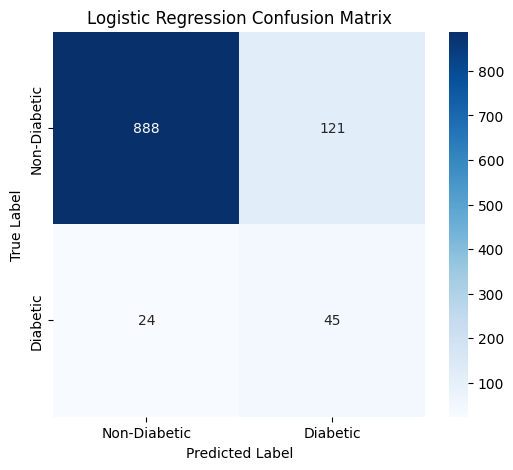

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_lr_custom_threshold))

# Confusion Matrix
confusion_lr = confusion_matrix(y_test, y_pred_lr_custom_threshold)
print("Confusion Matrix:")
print(confusion_lr)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### b. ROC Curve and AUC

Logistic Regression ROC-AUC Score: 0.8736300828772927


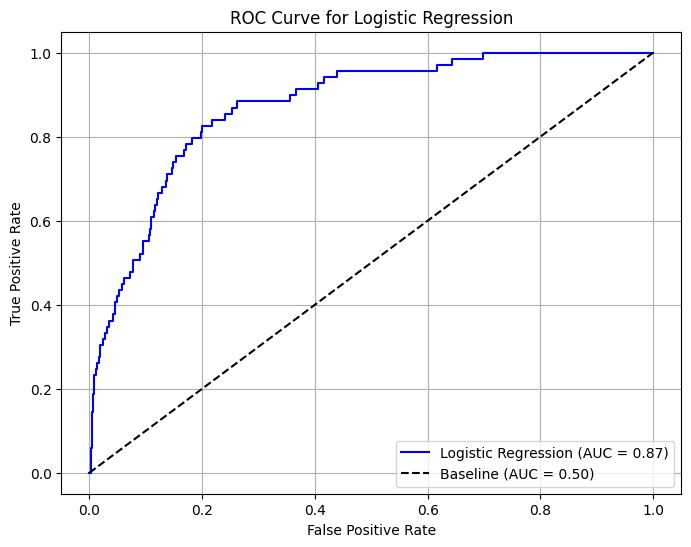

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

# Compute ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Baseline (AUC = 0.50)")  # Diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


#  Random Forest

## Hyperparameter Tuning

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2]        # Minimum samples required at a leaf node
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,                # Cross-validation with 5 folds
    scoring='f1',        # F1-score for evaluation due to class imbalance
    n_jobs=-1            # Utilize all available CPU cores
)

# Perform GridSearchCV
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Training the Model with Optimized Hyperparameters

In [100]:
# Train the model using the best parameters
best_rf = grid_search_rf.best_estimator_

# Predict probabilities for the test set
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Set a custom threshold (e.g., 0.65)
threshold = 0.65
y_pred_rf_custom_threshold = (y_proba_rf >= threshold).astype(int)


## Final Evaluation

### a. Classification Report and Confusion Matrix

Classification Report (Threshold = 0.65):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1009
           1       0.60      0.36      0.45        69

    accuracy                           0.94      1078
   macro avg       0.78      0.67      0.71      1078
weighted avg       0.93      0.94      0.94      1078

Confusion Matrix:
[[992  17]
 [ 44  25]]


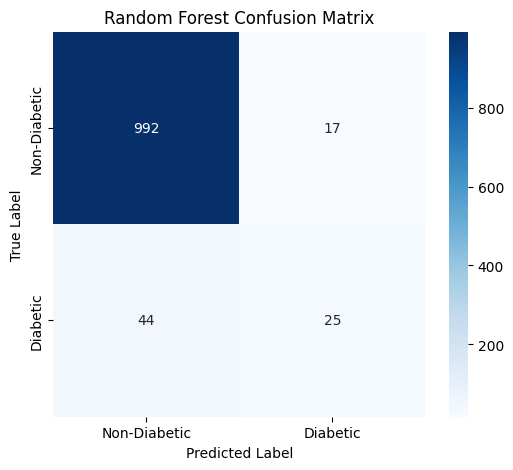

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_rf_custom_threshold))

# Confusion Matrix
confusion_rf = confusion_matrix(y_test, y_pred_rf_custom_threshold)
print("Confusion Matrix:")
print(confusion_rf)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### b. ROC Curve and AUC

Random Forest ROC-AUC Score: 0.8888194653911894


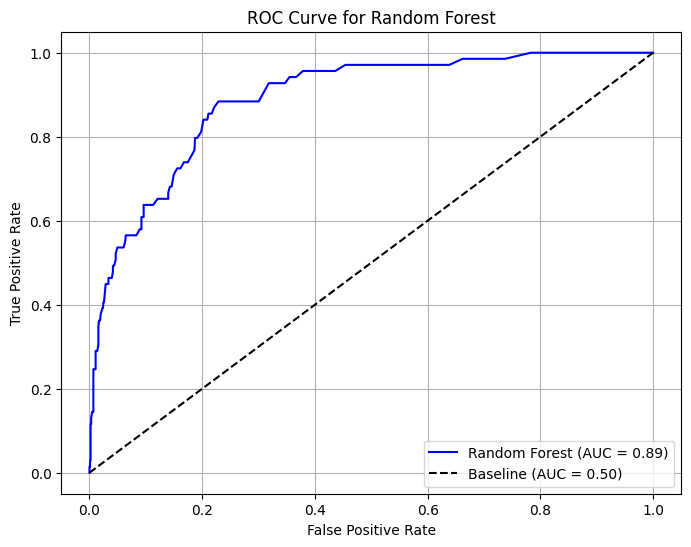

In [102]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, y_proba_rf)
print("Random Forest ROC-AUC Score:", rf_roc_auc)

# Compute ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Baseline (AUC = 0.50)")  # Diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# SVM

## Hyperparameter Tuning

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']    # Kernel coefficient for 'rbf' kernel
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(
    SVC(probability=True, random_state=42),  # SVM with probability outputs
    param_grid=param_grid_svm,
    cv=5,                 # 5-fold cross-validation
    scoring='f1',         # Use F1-score for evaluation
    n_jobs=-1             # Utilize all CPU cores
)

# Perform GridSearchCV
grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)


Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


## Training the Model with Optimized Hyperparameters

In [104]:
# Train the model using the best parameters
best_svm = grid_search_svm.best_estimator_

# Predict probabilities for the test set
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Set a custom threshold (e.g., 0.7)
threshold = 0.7
y_pred_svm_custom_threshold = (y_proba_svm >= threshold).astype(int)


## Final Evaluation

### a. Classification Report and Confusion Matrix

Classification Report (Threshold = 0.7):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1009
           1       0.34      0.49      0.40        69

    accuracy                           0.91      1078
   macro avg       0.65      0.71      0.68      1078
weighted avg       0.92      0.91      0.91      1078

Confusion Matrix:
[[944  65]
 [ 35  34]]


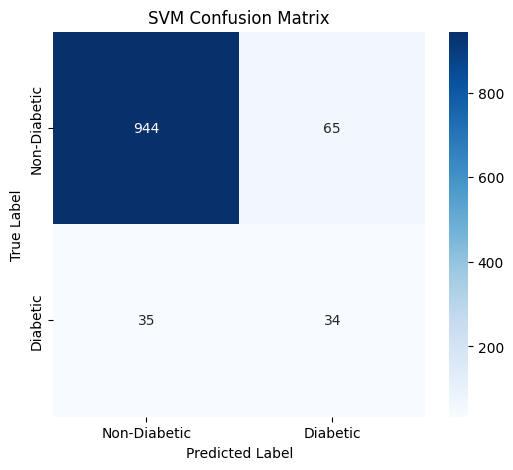

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_svm_custom_threshold))

# Confusion Matrix
confusion_svm = confusion_matrix(y_test, y_pred_svm_custom_threshold)
print("Confusion Matrix:")
print(confusion_svm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### b. ROC Curve and AUC

SVM ROC-AUC Score: 0.8295772827164218


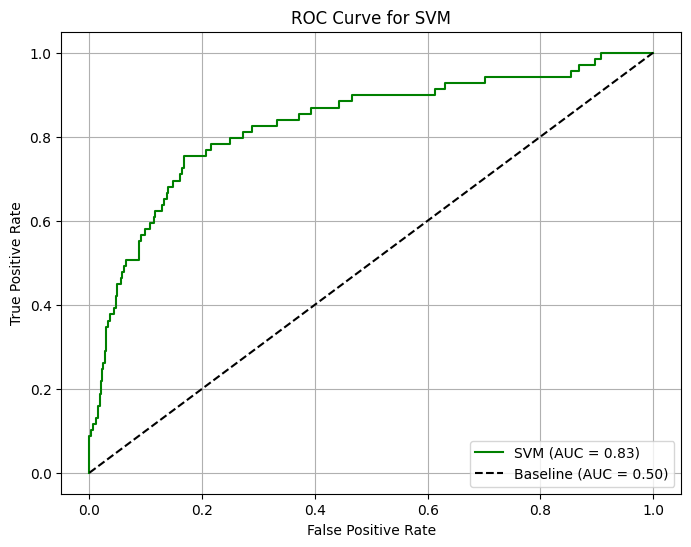

In [106]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC score
svm_roc_auc = roc_auc_score(y_test, y_proba_svm)
print("SVM ROC-AUC Score:", svm_roc_auc)

# Compute ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {svm_roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Baseline (AUC = 0.50)")  # Diagonal baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# XGBoost

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_final, X_test_final are already processed and ready, including One-Hot Encoding

# SMOTE for class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_final, y_train)

# Train XGBoost model with class imbalance handling
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train_smote) / (2 * sum(y_train_smote)), 
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

xgb_model.fit(X_train_smote, y_train_smote)

# Get predicted probabilities for class 1
y_pred_proba_xgb = xgb_model.predict_proba(X_test_final)[:, 1]

# Set custom threshold (for example, 0.3)
threshold = 0.4
y_pred_xgb_custom_threshold = (y_pred_proba_xgb >= threshold).astype(int)

# Evaluate model performance with the custom threshold
print(f"XGBoost Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_xgb_custom_threshold))

# Confusion Matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_custom_threshold))

# ROC-AUC Score
xgb_roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
print("XGBoost ROC-AUC Score:", xgb_roc_auc)

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# CatBoost

In [ ]:
!pip install catboost


In [ ]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train CatBoost model
catboost_model = CatBoostClassifier(
    iterations=500, 
    class_weights=[1, len(y_train_smote) / sum(y_train_smote)],
    random_state=42, 
    verbose=0
)

catboost_model.fit(X_train_smote, y_train_smote)

# Get predicted probabilities for class 1
y_pred_proba_catboost = catboost_model.predict_proba(X_test_final)[:, 1]

# Set custom threshold (for example, 0.3)
threshold = 0.5
y_pred_catboost_custom_threshold = (y_pred_proba_catboost >= threshold).astype(int)

# Evaluate model performance with the custom threshold
print(f"CatBoost Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_catboost_custom_threshold))

# Confusion Matrix
print("CatBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost_custom_threshold))

# ROC-AUC Score
catboost_roc_auc = roc_auc_score(y_test, y_pred_proba_catboost)
print("CatBoost ROC-AUC Score:", catboost_roc_auc)

# Plot ROC Curve
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_proba_catboost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, label=f"CatBoost (AUC = {catboost_roc_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CatBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Comparison of all 5 Models based on performance for minority class

# Overall Performance Ranking: